In [1]:
pip install tensorflow

  Using cached numpy-1.24.3-cp311-cp311-macosx_10_9_x86_64.whl (19.8 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
transformers 2.1.1 requires sentencepiece, which is not installed.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns # Будем визулизировать данные этой библиотекой
import matplotlib.pyplot as plt # Будем визулизировать данные этой библиотекой
sns.set_style('darkgrid')

In [5]:

#from sklearn.preprocessing import StandardScaler # Масштабирование данных
from keras.models import load_model

In [4]:
from keras.models import Sequential, Model
from keras.layers import Dense, MaxPooling1D, Conv1D, Flatten, Dropout, BatchNormalization, Input, Embedding, SpatialDropout1D, concatenate, Concatenate, Activation
from keras.optimizers import Adam, Adadelta, SGD
#from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras import datasets, layers, models, losses
from keras.utils import load_img, to_categorical, plot_model
#from sklearn.model_selection import train_test_split

In [640]:
import re
from tabulate import tabulate

In [6]:
pd.set_option("display.max_columns", 100)

### Загрузка общей базы

In [642]:
path = '/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/df_all_balance_new.csv'
df = pd.read_csv(path)
df.head()

,owner_id,contract_id,issue_dt,close_dt,region_name,city_name,population,date_of_birth,gender,education,position,dt_nbki,id_nbki,issued,amount,type_credit,status_credit,period,psk,balance,current_indebtedness,expired,last_payment,updated,term_indebtedness_body_loan,term_indebtedness_interest,term_indebtedness_other,overdue_indebtedness_body_loan,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_Months,amount_surety,source_information,maximum_amount_overdue_indebtedness,date_credit_state,amount_principal_debt_repaid,availability_support,Client_class
0,104,23492,1665964800,1668816000,3,468,182291,373161600,0,1,20,1665964800,3330,1148688000,0.00,12,2,2197584000,0.000,141531.65,0.0,0.0,1421280000,1660608000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,1421280000,140070.97,0,0
1,104,23492,1665964800,1668816000,3,468,182291,373161600,0,1,20,1665964800,3330,1370476800,168000.00,11,2,1529280000,0.000,268860.28,0.0,0.0,1529280000,1529452800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3240.15,1529280000,168000.00,0,0
2,104,23492,1665964800,1668816000,3,468,182291,373161600,0,1,20,1665964800,3330,1418860800,29356.04,21,2,1450310400,40.998,39779.33,0.0,0.0,1450310400,1451433600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,1450310400,29356.04,0,0
3,104,23492,1665964800,1668816000,3,468,182291,373161600,0,1,20,1665964800,3330,1447372800,15620.00,21,2,1479081600,0.000,0.00,0.0,0.0,1476316800,1476316800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1157.42,1476316800,0.00,0,0
4,104,23492,1665964800,1668816000,3,468,182291,373161600,0,1,20,1665964800,3330,1449446400,32000.00,12,2,1633046400,29.768,186130.59,0.0,0.0,1629072000,1633046400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,1633046400,128642.19,0,0


### Предобработка

In [643]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1708073 entries, 0 to 1708072
Data columns (total 38 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   owner_id                             int64  
 1   contract_id                          int64  
 2   issue_dt                             int64  
 3   close_dt                             int64  
 4   region_name                          int64  
 5   city_name                            int64  
 6   population                           int64  
 7   date_of_birth                        int64  
 8   gender                               int64  
 9   education                            int64  
 10  position                             int64  
 11  dt_nbki                              int64  
 12  id_nbki                              int64  
 13  issued                               int64  
 14  amount                               float64
 15  type_credit                     

owner_id                               0.0
contract_id                            0.0
issue_dt                               0.0
close_dt                               0.0
region_name                            0.0
city_name                              0.0
population                             0.0
date_of_birth                          0.0
gender                                 0.0
education                              0.0
position                               0.0
dt_nbki                                0.0
id_nbki                                0.0
issued                                 0.0
amount                                 0.0
type_credit                            0.0
status_credit                          0.0
period                                 0.0
psk                                    0.0
balance                                0.0
current_indebtedness                   0.0
expired                                0.0
last_payment                           0.0
updated    

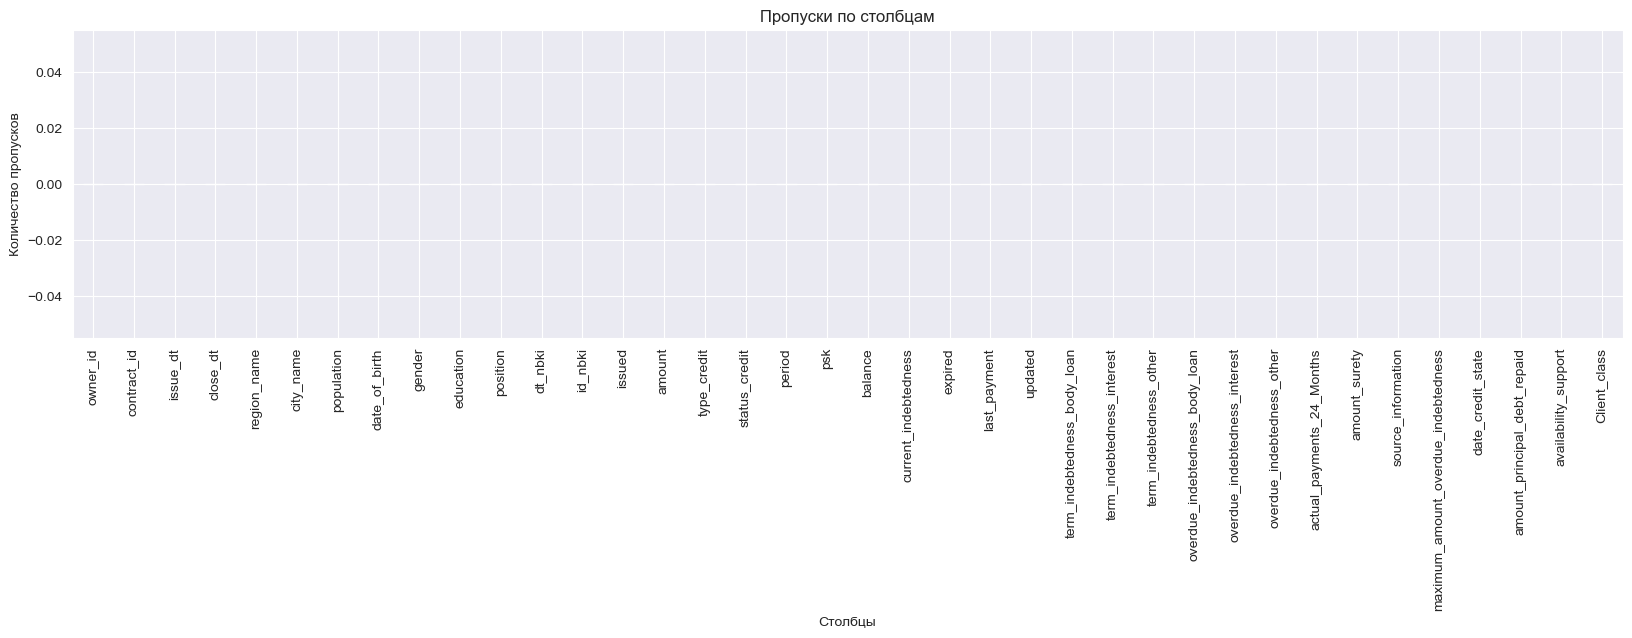

In [644]:
missing_percentages = round(df.isnull().mean() * 100)
print(missing_percentages)

# Отрисовываем график
plt.figure(figsize=(20, 4))
missing_percentages.plot(kind='bar')
plt.title('Пропуски по столбцам')
plt.xlabel('Столбцы')
plt.ylabel('Количество пропусков')
plt.show()

In [483]:
df = df.fillna(0)

In [484]:
df. isnull() .sum() .sum()

0

In [485]:
df.shape

(1708712, 39)

In [486]:
df.agg(['nunique']).transpose()

,nunique
owner_id,26527
contract_id,30656
issue_dt,1851
close_dt,1827
region_name,71
city_name,807
population,803
date_of_birth,21823
gender,2
education,8


0    427178
1    427178
2    427178
3    427178
Name: Client_class, dtype: int64


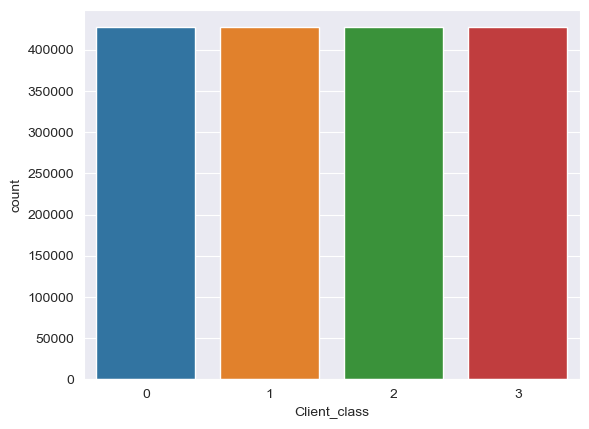

In [487]:
print(df.Client_class.value_counts())
sns.countplot(x=df.Client_class);

In [488]:
# Выбор столбцов, которые нужно преобразовать
columns_to_encode = ['amount', 'psk', 'balance', 'term_indebtedness_body_loan', 'overdue_indebtedness_body_loan', 'maximum_amount_overdue_indebtedness', 'amount_principal_debt_repaid']

# Замена запятой на точку
df[columns_to_encode] = df[columns_to_encode].replace(',', '.', regex=True)

# Приведение выбранных столбцов к типу float64
df[columns_to_encode] = df[columns_to_encode].astype('float64')

In [489]:
df['population'].value_counts()

182291.0    386522
11103.0      55256
64176.0      17435
24131.0      15290
27788.0      14468
             ...  
43191.0         34
27189.0         32
12408.0         28
9615.0          25
11312.0          1
Name: population, Length: 803, dtype: int64

In [490]:
df['population'] = df['population'].astype(int)  #Меняем тип данных population на int 

In [491]:
df.info()             # Тип столбца population также изменилось

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1708712 entries, 0 to 1708711
Data columns (total 39 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   owner_id                             object 
 1   contract_id                          object 
 2   issue_dt                             object 
 3   close_dt                             object 
 4   region_name                          object 
 5   city_name                            object 
 6   population                           int64  
 7   date_of_birth                        object 
 8   gender                               object 
 9   education                            object 
 10  position                             object 
 11  dt_nbki                              object 
 12  id_nbki                              object 
 13  issued                               object 
 14  amount                               float64
 15  currency                        

In [492]:
df['amount'].unique()     # Проверка изменений

array([     0.  , 168000.  ,  29356.04, ...,  69968.  ,  26057.  ,
        21410.  ])

### Обработка данных о дате

In [500]:
df['last_payment'].value_counts()

0             187433
1664150400      2323
1663891200      2314
1663632000      2306
1664496000      2299
               ...  
1143158400         1
1156550400         1
1173484800         1
1262390400         1
1264809600         1
Name: last_payment, Length: 6353, dtype: int64

In [238]:
#df['close_dt'] = df['close_dt'].fillna(0)

In [496]:
# Преобразование колонок с датами в формат типа unixtime

date_columns = ['issue_dt', 'close_dt', 'date_of_birth','dt_nbki', 'issued', 'period','last_payment', 'updated', 'date_credit_state']

for column in date_columns:
    df[column] = pd.to_datetime(df[column], errors='coerce').astype(int) // 10**9


In [470]:
df['date_credit_state'].unique()

array([1421280000, 1529280000, 1450310400, ..., 1163808000, 1264809600,
       1290211200])

In [498]:
df_copy = df.copy()

In [499]:
# Удаляем некорректные значения. Чтобы не нарушалась балансировка приравняем некорректные значения к 0

#date_columns = ['issue_dt', 'close_dt', 'date_of_birth','dt_nbki', 'issued', 'period','last_payment', 'updated', 'date_credit_state']
#for date in date_columns:
#    df = df[df[date] >= 0]
date_columns = ['issue_dt', 'close_dt', 'date_of_birth','dt_nbki', 'issued', 'period','last_payment', 'updated', 'date_credit_state'] 
for date in date_columns: 
    df.loc[df[date] <= 0, date] = 0


In [501]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1708712 entries, 0 to 1708711
Data columns (total 39 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   owner_id                             object 
 1   contract_id                          object 
 2   issue_dt                             int64  
 3   close_dt                             int64  
 4   region_name                          object 
 5   city_name                            object 
 6   population                           int64  
 7   date_of_birth                        int64  
 8   gender                               object 
 9   education                            object 
 10  position                             object 
 11  dt_nbki                              int64  
 12  id_nbki                              object 
 13  issued                               int64  
 14  amount                               float64
 15  currency                        

### Встраивание id клиентов 

In [502]:

from sklearn.preprocessing import LabelEncoder

# Кодирование owner_id, contract_id, id_nbki
label_encoder = LabelEncoder()
df['owner_id'] = label_encoder.fit_transform(df['owner_id'])
df['contract_id'] = label_encoder.fit_transform(df['contract_id'])
df['id_nbki'] = label_encoder.fit_transform(df['id_nbki'])



In [503]:
df.head()

,owner_id,contract_id,issue_dt,close_dt,region_name,city_name,population,date_of_birth,gender,education,position,dt_nbki,id_nbki,issued,amount,currency,type_credit,status_credit,period,psk,balance,current_indebtedness,expired,last_payment,updated,term_indebtedness_body_loan,term_indebtedness_interest,term_indebtedness_other,overdue_indebtedness_body_loan,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_Months,amount_surety,source_information,maximum_amount_overdue_indebtedness,date_credit_state,amount_principal_debt_repaid,availability_support,Client_class
0,104,23492,1665964800,1668816000,Архангельская область,г. Северодвинск,182291,373161600,Женский,0,сотрудники крупного бизнеса,1665964800,3330,1148688000,0.00,RUB,КредитнаяКарта,Активный,2197584000,0.000,141531.65,0.0,0.0,1421280000,1660608000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Банк,0.00,1421280000,140070.97,False,0
1,104,23492,1665964800,1668816000,Архангельская область,г. Северодвинск,182291,373161600,Женский,0,сотрудники крупного бизнеса,1665964800,3330,1370476800,168000.00,RUB,КредитНаличнымиНецелевой,СчетЗакрыт,1529280000,0.000,268860.28,0.0,0.0,1529280000,1529452800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Банк,3240.15,1529280000,168000.00,False,0
2,104,23492,1665964800,1668816000,Архангельская область,г. Северодвинск,182291,373161600,Женский,0,сотрудники крупного бизнеса,1665964800,3330,1418860800,29356.04,RUB,Потребительский,СчетЗакрыт,1450310400,40.998,39779.33,0.0,0.0,1450310400,1451433600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Банк,0.00,1450310400,29356.04,False,0
3,104,23492,1665964800,1668816000,Архангельская область,г. Северодвинск,182291,373161600,Женский,0,сотрудники крупного бизнеса,1665964800,3330,1447372800,15620.00,RUB,Потребительский,СчетЗакрыт,1479081600,0.000,0.00,0.0,0.0,1476316800,1476316800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Банк,1157.42,1476316800,0.00,False,0
4,104,23492,1665964800,1668816000,Архангельская область,г. Северодвинск,182291,373161600,Женский,0,сотрудники крупного бизнеса,1665964800,3330,1449446400,32000.00,RUB,КредитнаяКарта,СчетЗакрыт,1633046400,29.768,186130.59,0.0,0.0,1629072000,1633046400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Банк,0.00,1633046400,128642.19,False,0


### Работа с категориальными данными

In [504]:
# Вывод столбцов типа "объект"
object_columns = df.select_dtypes(include=['object'])
print(object_columns.columns)

Index(['region_name', 'city_name', 'gender', 'education', 'position',
       'currency', 'type_credit', 'status_credit', 'source_information',
       'availability_support'],
      dtype='object')


### Region name

In [505]:
df['region_name'] = df['region_name'].astype ('category')


In [506]:
df['region_name'].value_counts ()

Архангельская область    475493
Краснодарский край        79991
Мурманская область        59850
Владимирская область      52113
Белгородская область      45912
                          ...  
Кабардино-Балкария         1386
Северная Осетия            1181
Еврейская АО                672
Адыгея республика           628
0                           448
Name: region_name, Length: 71, dtype: int64

In [412]:
# Удаляем все строки, содержаие значение 0
#df = df[df['region_name'] != 0]

In [507]:
df.shape

(1708712, 39)

0    427178
1    427178
2    427178
3    427178
Name: Client_class, dtype: int64


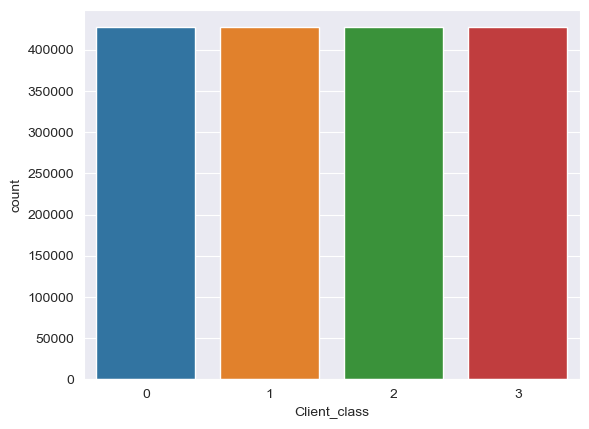

In [508]:
print(df.Client_class.value_counts())
sns.countplot(x=df.Client_class);

### Population

In [509]:
df['population'].value_counts()

182291    386522
11103      55256
64176      17435
24131      15290
27788      14468
           ...  
43191         34
27189         32
12408         28
9615          25
11312          1
Name: population, Length: 803, dtype: int64

In [510]:

df['population'] = df['population'].astype(int)  #Меняем тип данных population на int 

### Education

In [511]:
df['education'].unique()

array([0, 'Высшее', 'СреднеТехническое', 'НеполноеСреднее', 'Среднее',
       'НеполноеВысшее', 'НесколькоВысших', 'УченаяСтепень'], dtype=object)

In [512]:
df['education'] = df['education'].replace(0, 'Неизвестно')

In [513]:
df['education'].unique()

array(['Неизвестно', 'Высшее', 'СреднеТехническое', 'НеполноеСреднее',
       'Среднее', 'НеполноеВысшее', 'НесколькоВысших', 'УченаяСтепень'],
      dtype=object)

### Position

In [514]:
df['position'].unique()

array(['сотрудники крупного бизнеса', 'сотрудник малого бизнеса',
       'специалист', 'рабочий', 0, 'индивидуальный предприниматель (ип)',
       'работник бюджетной сферы', 'муниципальный служащий',
       'сотрудник градообразующего предприятия', 'госслужащий',
       'самозанятый', 'руководитель', 'технический специалист',
       'работник социальной сферы', 'работник промышленных предприятий',
       'пенсионер', 'прочее', 'работник с/х', 'военнослужащий', 'сварщик',
       'разнорабочий', 'судебная власть, права человека', 'маляр',
       'водитель'], dtype=object)

In [515]:
df['position'] = df['position'].replace(0, 'неопределено')

In [516]:
df['position'].unique()

array(['сотрудники крупного бизнеса', 'сотрудник малого бизнеса',
       'специалист', 'рабочий', 'неопределено',
       'индивидуальный предприниматель (ип)', 'работник бюджетной сферы',
       'муниципальный служащий', 'сотрудник градообразующего предприятия',
       'госслужащий', 'самозанятый', 'руководитель',
       'технический специалист', 'работник социальной сферы',
       'работник промышленных предприятий', 'пенсионер', 'прочее',
       'работник с/х', 'военнослужащий', 'сварщик', 'разнорабочий',
       'судебная власть, права человека', 'маляр', 'водитель'],
      dtype=object)

In [517]:
df['position'].value_counts()

пенсионер                                 584544
сотрудник малого бизнеса                  201383
рабочий                                   171747
специалист                                105561
госслужащий                                88741
сотрудники крупного бизнеса                80380
работник промышленных предприятий          78480
прочее                                     72891
работник бюджетной сферы                   72037
неопределено                               70081
муниципальный служащий                     49139
индивидуальный предприниматель (ип)        31395
руководитель                               27354
работник с/х                               21908
работник социальной сферы                  16673
военнослужащий                             14505
самозанятый                                11713
технический специалист                      4895
сотрудник градообразующего предприятия      3811
сварщик                                      691
судебная власть, пра

### Source information

In [518]:
df['source_information'].value_counts() 

МФО                              1461836
Банк                              215611
Коллекторы                         17782
КПК                                 9016
Другой                              2317
Розница                              852
ЖилищныеКредиты                      637
0                                    627
Ломбард                               17
Брокер                                15
ИндивидуальныйПредприниматель          1
ФинансоваяКомпания                     1
Name: source_information, dtype: int64

In [519]:
df['source_information'] = df['source_information'].replace(0, 'Неизвестно')

In [520]:
df['source_information'].value_counts()

МФО                              1461836
Банк                              215611
Коллекторы                         17782
КПК                                 9016
Другой                              2317
Розница                              852
ЖилищныеКредиты                      637
Неизвестно                           627
Ломбард                               17
Брокер                                15
ИндивидуальныйПредприниматель          1
ФинансоваяКомпания                     1
Name: source_information, dtype: int64

### Status credit
#### Приведение столбца со статусом кредита к бинарной классификации

In [521]:
df['status_credit'].value_counts()

СчетЗакрыт                                 1393240
Активный                                    192283
Просрочен                                    75660
ПереданНаОбслуживаниеВДругуюОрганизацию      37560
ПередачаДанныхПрекращена                      5078
ПроблемыСВозвратом                            2590
0                                             1008
Рефинансирован                                 771
СписанСБаланса                                 175
Спор                                           114
Банкротство                                    110
ОплаченЗаСчетОбеспечения                        74
ПринудительноеИсполнение                        38
Расторгнут                                      11
Name: status_credit, dtype: int64

In [522]:
col_to_replace_on0 =  ['Просрочен', 'Рефинансирован', 'Банкротство', 'ПринудительноеИсполнение', 'ПроблемыСВозвратом', 'Спор', 'Расторгнут']
df['status_credit'] = df['status_credit'].replace (col_to_replace_on0, 'Плохой')


In [523]:
col_to_replace_on1 =  ['СчетЗакрыт', 'Активный', 'ПереданНаОбслуживаниеВДругуюОрганизацию', 'ПередачаДанныхПрекращена', 'СписанСБаланса','ОплаченЗаСчетОбеспечения']
df['status_credit'] = df['status_credit'].replace (col_to_replace_on1, 'Хороший')


In [524]:
df['status_credit'] = df['status_credit'].replace(0, 'СтатусНеизвестен')

In [525]:
df['status_credit'].value_counts()

Хороший             1628410
Плохой                79294
СтатусНеизвестен       1008
Name: status_credit, dtype: int64

### Currency

In [526]:
df['currency'].value_counts()

RUB    1708073
0          628
USD         10
EUR          1
Name: currency, dtype: int64

In [527]:
df_copy = df.copy()

In [288]:
#df = df_copy

In [528]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1708712 entries, 0 to 1708711
Data columns (total 39 columns):
 #   Column                               Dtype   
---  ------                               -----   
 0   owner_id                             int64   
 1   contract_id                          int64   
 2   issue_dt                             int64   
 3   close_dt                             int64   
 4   region_name                          category
 5   city_name                            object  
 6   population                           int64   
 7   date_of_birth                        int64   
 8   gender                               object  
 9   education                            object  
 10  position                             object  
 11  dt_nbki                              int64   
 12  id_nbki                              int64   
 13  issued                               int64   
 14  amount                               float64 
 15  currency       

In [529]:
df['currency'].unique()

array(['RUB', 0, 'USD', 'EUR'], dtype=object)

In [530]:
# Преобразование значений в колонке currency к строковому типу (если они не являются строками)
df['currency'] = df['currency'].astype(str)

# Замена NaN значений пустыми строками
df['currency'].fillna('', inplace=True)

# Удаление строк, содержащих '0', 'usd' или 'eur' в колонке currency
df = df[~df['currency'].str.contains('0|USD|EUR')]


In [531]:
df['currency'].value_counts()

RUB    1708073
Name: currency, dtype: int64

In [532]:
df = df.drop(columns='currency')          #удаление столбца валюта

In [533]:
df.head()

,owner_id,contract_id,issue_dt,close_dt,region_name,city_name,population,date_of_birth,gender,education,position,dt_nbki,id_nbki,issued,amount,type_credit,status_credit,period,psk,balance,current_indebtedness,expired,last_payment,updated,term_indebtedness_body_loan,term_indebtedness_interest,term_indebtedness_other,overdue_indebtedness_body_loan,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_Months,amount_surety,source_information,maximum_amount_overdue_indebtedness,date_credit_state,amount_principal_debt_repaid,availability_support,Client_class
0,104,23492,1665964800,1668816000,Архангельская область,г. Северодвинск,182291,373161600,Женский,Неизвестно,сотрудники крупного бизнеса,1665964800,3330,1148688000,0.00,КредитнаяКарта,Хороший,2197584000,0.000,141531.65,0.0,0.0,1421280000,1660608000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Банк,0.00,1421280000,140070.97,False,0
1,104,23492,1665964800,1668816000,Архангельская область,г. Северодвинск,182291,373161600,Женский,Неизвестно,сотрудники крупного бизнеса,1665964800,3330,1370476800,168000.00,КредитНаличнымиНецелевой,Хороший,1529280000,0.000,268860.28,0.0,0.0,1529280000,1529452800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Банк,3240.15,1529280000,168000.00,False,0
2,104,23492,1665964800,1668816000,Архангельская область,г. Северодвинск,182291,373161600,Женский,Неизвестно,сотрудники крупного бизнеса,1665964800,3330,1418860800,29356.04,Потребительский,Хороший,1450310400,40.998,39779.33,0.0,0.0,1450310400,1451433600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Банк,0.00,1450310400,29356.04,False,0
3,104,23492,1665964800,1668816000,Архангельская область,г. Северодвинск,182291,373161600,Женский,Неизвестно,сотрудники крупного бизнеса,1665964800,3330,1447372800,15620.00,Потребительский,Хороший,1479081600,0.000,0.00,0.0,0.0,1476316800,1476316800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Банк,1157.42,1476316800,0.00,False,0
4,104,23492,1665964800,1668816000,Архангельская область,г. Северодвинск,182291,373161600,Женский,Неизвестно,сотрудники крупного бизнеса,1665964800,3330,1449446400,32000.00,КредитнаяКарта,Хороший,1633046400,29.768,186130.59,0.0,0.0,1629072000,1633046400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Банк,0.00,1633046400,128642.19,False,0


### Availability support

In [534]:
df['availability_support'].value_counts()

False    1683997
False      12937
True        7692
0.0         3297
True         138
1.0           12
Name: availability_support, dtype: int64

In [535]:
# Преобразование значений в колонке currency к строковому типу (если они не являются строками)
df['availability_support'] = df['availability_support'].astype(str)

# Замена NaN значений пустыми строками
df['availability_support'].replace('0.0', 'No', inplace=True)
df['availability_support'].replace('1.0', 'Yes', inplace=True)
df['availability_support'].replace('False', 'No', inplace=True)
df['availability_support'].replace('True', 'Yes', inplace=True)

# Преобразование значений в колонке к категориальному  типу 
df['availability_support'] = df['availability_support'].astype('category')


In [536]:
df['availability_support'].value_counts()

No     1700231
Yes       7842
Name: availability_support, dtype: int64

In [537]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1708073 entries, 0 to 1708711
Data columns (total 38 columns):
 #   Column                               Dtype   
---  ------                               -----   
 0   owner_id                             int64   
 1   contract_id                          int64   
 2   issue_dt                             int64   
 3   close_dt                             int64   
 4   region_name                          category
 5   city_name                            object  
 6   population                           int64   
 7   date_of_birth                        int64   
 8   gender                               object  
 9   education                            object  
 10  position                             object  
 11  dt_nbki                              int64   
 12  id_nbki                              int64   
 13  issued                               int64   
 14  amount                               float64 
 15  type_credit    

### Работа над остальными столбцами типа object

In [538]:
# Выбираем столбцы типа 'object'
object_columns = df.select_dtypes(include=['object'])

# Выводим только названия столбцов
column_names = object_columns.columns.tolist()
print(column_names)

# Приводим выбранные столбцы к категориальному типу
df[column_names] = df[column_names].astype('category')

['city_name', 'gender', 'education', 'position', 'type_credit', 'status_credit', 'source_information']


In [539]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1708073 entries, 0 to 1708711
Data columns (total 38 columns):
 #   Column                               Dtype   
---  ------                               -----   
 0   owner_id                             int64   
 1   contract_id                          int64   
 2   issue_dt                             int64   
 3   close_dt                             int64   
 4   region_name                          category
 5   city_name                            category
 6   population                           int64   
 7   date_of_birth                        int64   
 8   gender                               category
 9   education                            category
 10  position                             category
 11  dt_nbki                              int64   
 12  id_nbki                              int64   
 13  issued                               int64   
 14  amount                               float64 
 15  type_credit    

In [540]:
# Выбор столбцов, которые нужно преобразовать
columns_to_encode = ['region_name', 'city_name', 'gender', 'education', 'position', 'type_credit', 'status_credit', 'source_information', 'availability_support']

df[columns_to_encode] = df[columns_to_encode].apply(lambda x: x.astype('category').cat.codes)



In [541]:
df.head()

,owner_id,contract_id,issue_dt,close_dt,region_name,city_name,population,date_of_birth,gender,education,position,dt_nbki,id_nbki,issued,amount,type_credit,status_credit,period,psk,balance,current_indebtedness,expired,last_payment,updated,term_indebtedness_body_loan,term_indebtedness_interest,term_indebtedness_other,overdue_indebtedness_body_loan,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_Months,amount_surety,source_information,maximum_amount_overdue_indebtedness,date_credit_state,amount_principal_debt_repaid,availability_support,Client_class
0,104,23492,1665964800,1668816000,3,468,182291,373161600,0,1,20,1665964800,3330,1148688000,0.00,12,2,2197584000,0.000,141531.65,0.0,0.0,1421280000,1660608000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,1421280000,140070.97,0,0
1,104,23492,1665964800,1668816000,3,468,182291,373161600,0,1,20,1665964800,3330,1370476800,168000.00,11,2,1529280000,0.000,268860.28,0.0,0.0,1529280000,1529452800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3240.15,1529280000,168000.00,0,0
2,104,23492,1665964800,1668816000,3,468,182291,373161600,0,1,20,1665964800,3330,1418860800,29356.04,21,2,1450310400,40.998,39779.33,0.0,0.0,1450310400,1451433600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,1450310400,29356.04,0,0
3,104,23492,1665964800,1668816000,3,468,182291,373161600,0,1,20,1665964800,3330,1447372800,15620.00,21,2,1479081600,0.000,0.00,0.0,0.0,1476316800,1476316800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1157.42,1476316800,0.00,0,0
4,104,23492,1665964800,1668816000,3,468,182291,373161600,0,1,20,1665964800,3330,1449446400,32000.00,12,2,1633046400,29.768,186130.59,0.0,0.0,1629072000,1633046400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,1633046400,128642.19,0,0


In [542]:
df.shape

(1708073, 38)

In [543]:
df_copy = df.copy()

In [544]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1708073 entries, 0 to 1708711
Data columns (total 38 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   owner_id                             int64  
 1   contract_id                          int64  
 2   issue_dt                             int64  
 3   close_dt                             int64  
 4   region_name                          int8   
 5   city_name                            int16  
 6   population                           int64  
 7   date_of_birth                        int64  
 8   gender                               int8   
 9   education                            int8   
 10  position                             int8   
 11  dt_nbki                              int64  
 12  id_nbki                              int64  
 13  issued                               int64  
 14  amount                               float64
 15  type_credit                     

In [545]:
df

,owner_id,contract_id,issue_dt,close_dt,region_name,city_name,population,date_of_birth,gender,education,position,dt_nbki,id_nbki,issued,amount,type_credit,status_credit,period,psk,balance,current_indebtedness,expired,last_payment,updated,term_indebtedness_body_loan,term_indebtedness_interest,term_indebtedness_other,overdue_indebtedness_body_loan,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_Months,amount_surety,source_information,maximum_amount_overdue_indebtedness,date_credit_state,amount_principal_debt_repaid,availability_support,Client_class
0,104,23492,1665964800,1668816000,3,468,182291,373161600,0,1,20,1665964800,3330,1148688000,0.00,12,2,2197584000,0.000,141531.65,0.0,0.0,1421280000,1660608000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,1421280000,140070.97,0,0
1,104,23492,1665964800,1668816000,3,468,182291,373161600,0,1,20,1665964800,3330,1370476800,168000.00,11,2,1529280000,0.000,268860.28,0.0,0.0,1529280000,1529452800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3240.15,1529280000,168000.00,0,0
2,104,23492,1665964800,1668816000,3,468,182291,373161600,0,1,20,1665964800,3330,1418860800,29356.04,21,2,1450310400,40.998,39779.33,0.0,0.0,1450310400,1451433600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,1450310400,29356.04,0,0
3,104,23492,1665964800,1668816000,3,468,182291,373161600,0,1,20,1665964800,3330,1447372800,15620.00,21,2,1479081600,0.000,0.00,0.0,0.0,1476316800,1476316800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1157.42,1476316800,0.00,0,0
4,104,23492,1665964800,1668816000,3,468,182291,373161600,0,1,20,1665964800,3330,1449446400,32000.00,12,2,1633046400,29.768,186130.59,0.0,0.0,1629072000,1633046400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,1633046400,128642.19,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1708707,21882,29110,1680220800,0,3,468,182291,638496000,1,1,13,1680220800,21271,1659398400,5000.00,14,2,1661212800,365.000,6102.73,0.0,0.0,1661299200,1661385600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.00,1661385600,5000.00,0,3
1708708,21882,29110,1680220800,0,3,468,182291,638496000,1,1,13,1680220800,21271,1659484800,6000.00,14,2,1661299200,361.000,6000.00,0.0,0.0,1661212800,1661212800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.00,1661212800,6000.00,0,3
1708709,21882,29110,1680220800,0,3,468,182291,638496000,1,1,13,1680220800,21271,1659916800,7000.00,14,2,1662422400,0.000,7000.00,0.0,0.0,1662076800,1662076800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.00,1662076800,7000.00,0,3
1708710,21882,29110,1680220800,0,3,468,182291,638496000,1,1,13,1680220800,21271,1661212800,8000.00,14,2,1663891200,361.000,10455.00,0.0,0.0,1663545600,1663545600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.00,1663545600,8000.00,0,3


2    427082
1    427063
0    427018
3    426910
Name: Client_class, dtype: int64


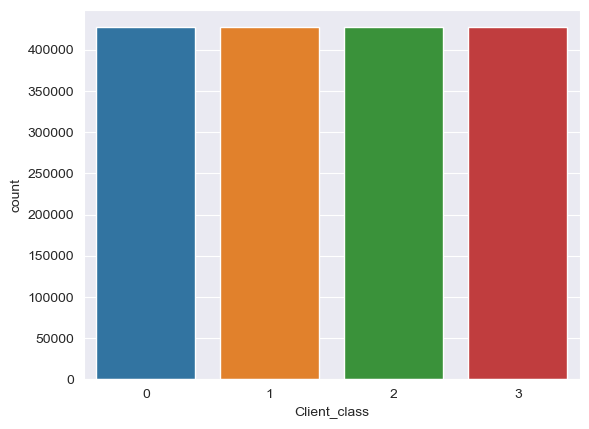

In [546]:
print(df.Client_class.value_counts())
sns.countplot(x=df.Client_class);

In [577]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1708073 entries, 0 to 1708072
Data columns (total 38 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   owner_id                             int64  
 1   contract_id                          int64  
 2   issue_dt                             int64  
 3   close_dt                             int64  
 4   region_name                          int64  
 5   city_name                            int64  
 6   population                           int64  
 7   date_of_birth                        int64  
 8   gender                               int64  
 9   education                            int64  
 10  position                             int64  
 11  dt_nbki                              int64  
 12  id_nbki                              int64  
 13  issued                               int64  
 14  amount                               float64
 15  type_credit                     

In [579]:
# Не запускать

# Приводим все типы данных к категориальному типу. Смотрим размерность базы

# Выбираем столбцы типа 'object'
object_columns = df.select_dtypes(include=['float64', 'int64', 'int16','int8'])

# Выводим только названия столбцов
column_names = object_columns.columns.tolist()
#print(column_names)

# Приводим выбранные столбцы к категориальному типу
df[column_names] = df[column_names].astype('category')

In [596]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1708073 entries, 0 to 1708072
Data columns (total 38 columns):
 #   Column                               Dtype   
---  ------                               -----   
 0   owner_id                             category
 1   contract_id                          category
 2   issue_dt                             category
 3   close_dt                             category
 4   region_name                          category
 5   city_name                            category
 6   population                           category
 7   date_of_birth                        category
 8   gender                               category
 9   education                            category
 10  position                             category
 11  dt_nbki                              category
 12  id_nbki                              category
 13  issued                               category
 14  amount                               category
 15  type_credit    

In [594]:
df

,owner_id,contract_id,issue_dt,close_dt,region_name,city_name,population,date_of_birth,gender,education,position,dt_nbki,id_nbki,issued,amount,type_credit,status_credit,period,psk,balance,current_indebtedness,expired,last_payment,updated,term_indebtedness_body_loan,term_indebtedness_interest,term_indebtedness_other,overdue_indebtedness_body_loan,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_Months,amount_surety,source_information,maximum_amount_overdue_indebtedness,date_credit_state,amount_principal_debt_repaid,availability_support,Client_class
0,104,23492,1665964800,1668816000,3,468,182291,373161600,0,1,20,1665964800,3330,1148688000,0.00,12,2,2197584000,0.000,141531.65,0.0,0.0,1421280000,1660608000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,1421280000,140070.97,0,0
1,104,23492,1665964800,1668816000,3,468,182291,373161600,0,1,20,1665964800,3330,1370476800,168000.00,11,2,1529280000,0.000,268860.28,0.0,0.0,1529280000,1529452800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3240.15,1529280000,168000.00,0,0
2,104,23492,1665964800,1668816000,3,468,182291,373161600,0,1,20,1665964800,3330,1418860800,29356.04,21,2,1450310400,40.998,39779.33,0.0,0.0,1450310400,1451433600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,1450310400,29356.04,0,0
3,104,23492,1665964800,1668816000,3,468,182291,373161600,0,1,20,1665964800,3330,1447372800,15620.00,21,2,1479081600,0.000,0.00,0.0,0.0,1476316800,1476316800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1157.42,1476316800,0.00,0,0
4,104,23492,1665964800,1668816000,3,468,182291,373161600,0,1,20,1665964800,3330,1449446400,32000.00,12,2,1633046400,29.768,186130.59,0.0,0.0,1629072000,1633046400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,1633046400,128642.19,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1708068,21882,29110,1680220800,0,3,468,182291,638496000,1,1,13,1680220800,21271,1659398400,5000.00,14,2,1661212800,365.000,6102.73,0.0,0.0,1661299200,1661385600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.00,1661385600,5000.00,0,3
1708069,21882,29110,1680220800,0,3,468,182291,638496000,1,1,13,1680220800,21271,1659484800,6000.00,14,2,1661299200,361.000,6000.00,0.0,0.0,1661212800,1661212800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.00,1661212800,6000.00,0,3
1708070,21882,29110,1680220800,0,3,468,182291,638496000,1,1,13,1680220800,21271,1659916800,7000.00,14,2,1662422400,0.000,7000.00,0.0,0.0,1662076800,1662076800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.00,1662076800,7000.00,0,3
1708071,21882,29110,1680220800,0,3,468,182291,638496000,1,1,13,1680220800,21271,1661212800,8000.00,14,2,1663891200,361.000,10455.00,0.0,0.0,1663545600,1663545600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.00,1663545600,8000.00,0,3


### Сохранение нормированной общей базы

In [597]:
# Сохранение датасета

df.to_csv('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/df_4_all_norm.csv', index=False)


In [575]:
# Загрузка датасета

df = pd.read_csv('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/df_4_all_norm.csv')


### Загрузка баз

In [8]:
# загрузка обучающей
df_train = pd.read_csv('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/df_train_bal.csv')

# загрузка validation
df_val = pd.read_csv('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/df_val_bal.csv')

# загрузка тестовой
df_test = pd.read_csv('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/df_test_bal.csv')

In [11]:
df_train

,owner_id,contract_id,issue_dt,close_dt,region_name,city_name,population,date_of_birth,gender,education,position,dt_nbki,id_nbki,issued,amount,type_credit,status_credit,period,psk,balance,current_indebtedness,expired,last_payment,updated,term_indebtedness_body_loan,term_indebtedness_interest,term_indebtedness_other,overdue_indebtedness_body_loan,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_Months,amount_surety,source_information,maximum_amount_overdue_indebtedness,date_credit_state,amount_principal_debt_repaid,availability_support,Client_class
0,49,9818,1665964800,1668816000,3,458,182291,373161600,0,1,19,1665964800,1351,1148688000,0.00,10,2,2197584000,0.000,141531.65,0.0,0.0,1421280000,1660608000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,1421280000,140070.97,0,0
1,49,9818,1665964800,1668816000,3,458,182291,373161600,0,1,19,1665964800,1351,1370476800,168000.00,9,2,1529280000,0.000,268860.28,0.0,0.0,1529280000,1529452800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3240.15,1529280000,168000.00,0,0
2,49,9818,1665964800,1668816000,3,458,182291,373161600,0,1,19,1665964800,1351,1418860800,29356.04,16,2,1450310400,40.998,39779.33,0.0,0.0,1450310400,1451433600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,1450310400,29356.04,0,0
3,49,9818,1665964800,1668816000,3,458,182291,373161600,0,1,19,1665964800,1351,1447372800,15620.00,16,2,1479081600,0.000,0.00,0.0,0.0,1476316800,1476316800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1157.42,1476316800,0.00,0,0
4,49,9818,1665964800,1668816000,3,458,182291,373161600,0,1,19,1665964800,1351,1449446400,32000.00,10,2,1633046400,29.768,186130.59,0.0,0.0,1629072000,1633046400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,1633046400,128642.19,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594683,9134,12193,1680220800,0,3,458,182291,638496000,1,1,13,1680220800,8592,1659398400,5000.00,11,2,1661212800,365.000,6102.73,0.0,0.0,1661299200,1661385600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,0.00,1661385600,5000.00,0,3
594684,9134,12193,1680220800,0,3,458,182291,638496000,1,1,13,1680220800,8592,1659484800,6000.00,11,2,1661299200,361.000,6000.00,0.0,0.0,1661212800,1661212800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,0.00,1661212800,6000.00,0,3
594685,9134,12193,1680220800,0,3,458,182291,638496000,1,1,13,1680220800,8592,1659916800,7000.00,11,2,1662422400,0.000,7000.00,0.0,0.0,1662076800,1662076800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,0.00,1662076800,7000.00,0,3
594686,9134,12193,1680220800,0,3,458,182291,638496000,1,1,13,1680220800,8592,1661212800,8000.00,11,2,1663891200,361.000,10455.00,0.0,0.0,1663545600,1663545600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,0.00,1663545600,8000.00,0,3


In [603]:
df_val

,owner_id,contract_id,issue_dt,close_dt,region_name,city_name,population,date_of_birth,gender,education,position,dt_nbki,id_nbki,issued,amount,type_credit,status_credit,period,psk,balance,current_indebtedness,expired,last_payment,updated,term_indebtedness_body_loan,term_indebtedness_interest,term_indebtedness_other,overdue_indebtedness_body_loan,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_Months,amount_surety,source_information,maximum_amount_overdue_indebtedness,date_credit_state,amount_principal_debt_repaid,availability_support,Client_class
0,104,23492,1665964800,1668816000,3,468,182291,373161600,0,1,20,1665964800,3330,1148688000,0.00,12,2,2197584000,0.000,141531.65,0.0,0.0,1421280000,1660608000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,1421280000,140070.97,0,0
1,104,23492,1665964800,1668816000,3,468,182291,373161600,0,1,20,1665964800,3330,1370476800,168000.00,11,2,1529280000,0.000,268860.28,0.0,0.0,1529280000,1529452800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3240.15,1529280000,168000.00,0,0
2,104,23492,1665964800,1668816000,3,468,182291,373161600,0,1,20,1665964800,3330,1418860800,29356.04,21,2,1450310400,40.998,39779.33,0.0,0.0,1450310400,1451433600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,1450310400,29356.04,0,0
3,104,23492,1665964800,1668816000,3,468,182291,373161600,0,1,20,1665964800,3330,1447372800,15620.00,21,2,1479081600,0.000,0.00,0.0,0.0,1476316800,1476316800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1157.42,1476316800,0.00,0,0
4,104,23492,1665964800,1668816000,3,468,182291,373161600,0,1,20,1665964800,3330,1449446400,32000.00,12,2,1633046400,29.768,186130.59,0.0,0.0,1629072000,1633046400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,1633046400,128642.19,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1707718,21870,29829,1676246400,0,29,317,144288,186019200,0,5,5,1676246400,11671,1657584000,20035.85,14,2,1660348800,255.500,24383.63,0.0,0.0,1660262400,1660262400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.00,1660262400,20035.85,0,3
1707719,21870,29829,1676246400,0,29,317,144288,186019200,0,5,5,1676246400,11671,1660262400,20035.85,14,2,1663027200,255.500,24523.88,0.0,0.0,1663027200,1663027200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.00,1663027200,20035.85,0,3
1707720,21870,29829,1676246400,0,29,317,144288,186019200,0,5,5,1676246400,11671,1665619200,20035.85,14,2,1668384000,244.804,24453.38,0.0,0.0,1668384000,1668384000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.00,1668384000,20035.85,0,3
1707721,21870,29829,1676246400,0,29,317,144288,186019200,0,5,5,1676246400,11671,1663027200,20035.85,14,2,1665619200,255.500,24243.38,0.0,0.0,1665619200,1665619200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.00,1665619200,20035.85,0,3


In [604]:
df_test

,owner_id,contract_id,issue_dt,close_dt,region_name,city_name,population,date_of_birth,gender,education,position,dt_nbki,id_nbki,issued,amount,type_credit,status_credit,period,psk,balance,current_indebtedness,expired,last_payment,updated,term_indebtedness_body_loan,term_indebtedness_interest,term_indebtedness_other,overdue_indebtedness_body_loan,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_Months,amount_surety,source_information,maximum_amount_overdue_indebtedness,date_credit_state,amount_principal_debt_repaid,availability_support,Client_class
342,504,26863,1665532800,1665878400,3,468,182291,397353600,0,1,13,1665532800,9313,1640131200,30000.0,12,2,1955664000,0.00,62866.5,0.0,0.0,1664409600,1664409600,13408.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1640131200,56291.11,0,0
343,504,26863,1665532800,1665878400,3,468,182291,397353600,0,1,13,1665532800,9313,1661126400,100000.0,12,2,0,25.34,1000.0,0.0,0.0,1662508800,1662508800,6859.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1661126400,1000.00,0,0
344,504,26863,1665532800,1665878400,3,468,182291,397353600,0,1,13,1665532800,9313,1662508800,4000.0,14,2,1663632000,0.00,4000.0,0.0,0.0,1663113600,1663113600,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.0,1663113600,4000.00,0,0
345,504,26863,1665532800,1665878400,3,468,182291,397353600,0,1,13,1665532800,9313,1662508800,6000.0,14,2,1663718400,365.00,6000.0,0.0,0.0,1663113600,1663200000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.0,1663113600,6000.00,0,0
346,504,26863,1665532800,1665878400,3,468,182291,397353600,0,1,13,1665532800,9313,1663027200,5000.0,14,2,1663372800,360.89,5197.0,0.0,0.0,1663372800,1663459200,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.0,1663372800,5000.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1708060,21881,28604,1619654400,0,19,439,10751,419385600,0,6,19,1619654400,7467,1440720000,800.0,14,2,1443398400,365.00,1048.0,0.0,0.0,1443398400,1443744000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.0,1443571200,0.00,0,3
1708061,21881,28604,1619654400,0,19,439,10751,419385600,0,6,19,1619654400,7467,1437609600,1500.0,14,2,1440028800,365.00,1920.0,0.0,0.0,1440028800,1441065600,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.0,1440892800,0.00,0,3
1708062,21881,28604,1619654400,0,19,439,10751,419385600,0,6,19,1619654400,7467,1435276800,1000.0,14,2,1437696000,365.00,0.0,0.0,0.0,0,1437696000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.0,1437523200,0.00,0,3
1708063,21881,28604,1619654400,0,19,439,10751,419385600,0,6,19,1619654400,7467,1432857600,1500.0,14,2,1435276800,182.50,0.0,0.0,0.0,1435276800,1435622400,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.0,1435449600,0.00,0,3


In [614]:
df_train['id_nbki'].value_counts()

17429    3458
10410    3380
4650     3380
23413    3354
10435    3250
         ... 
8899        0
8898        0
8896        0
8895        0
28973       0
Name: id_nbki, Length: 28410, dtype: int64

In [615]:
df_val['id_nbki'].value_counts()

2702     3458
22599    3042
257      2990
2347     2400
21950    1518
         ... 
10444       0
10443       0
10442       0
10441       0
28973       0
Name: id_nbki, Length: 28410, dtype: int64

In [616]:
df_test['id_nbki'].value_counts()

23237    3432
584      3432
16376    3406
28752    3146
5005     2700
         ... 
10663       0
10662       0
10661       0
10658       0
14469       0
Name: id_nbki, Length: 28410, dtype: int64

In [584]:
df.shape

(1708073, 38)

In [617]:
df.head()

,owner_id,contract_id,issue_dt,close_dt,region_name,city_name,population,date_of_birth,gender,education,position,dt_nbki,id_nbki,issued,amount,type_credit,status_credit,period,psk,balance,current_indebtedness,expired,last_payment,updated,term_indebtedness_body_loan,term_indebtedness_interest,term_indebtedness_other,overdue_indebtedness_body_loan,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_Months,amount_surety,source_information,maximum_amount_overdue_indebtedness,date_credit_state,amount_principal_debt_repaid,availability_support,Client_class
0,104,23492,1665964800,1668816000,3,468,182291,373161600,0,1,20,1665964800,3330,1148688000,0.00,12,2,2197584000,0.000,141531.65,0.0,0.0,1421280000,1660608000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,1421280000,140070.97,0,0
1,104,23492,1665964800,1668816000,3,468,182291,373161600,0,1,20,1665964800,3330,1370476800,168000.00,11,2,1529280000,0.000,268860.28,0.0,0.0,1529280000,1529452800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3240.15,1529280000,168000.00,0,0
2,104,23492,1665964800,1668816000,3,468,182291,373161600,0,1,20,1665964800,3330,1418860800,29356.04,21,2,1450310400,40.998,39779.33,0.0,0.0,1450310400,1451433600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,1450310400,29356.04,0,0
3,104,23492,1665964800,1668816000,3,468,182291,373161600,0,1,20,1665964800,3330,1447372800,15620.00,21,2,1479081600,0.000,0.00,0.0,0.0,1476316800,1476316800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1157.42,1476316800,0.00,0,0
4,104,23492,1665964800,1668816000,3,468,182291,373161600,0,1,20,1665964800,3330,1449446400,32000.00,12,2,1633046400,29.768,186130.59,0.0,0.0,1629072000,1633046400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,1633046400,128642.19,0,0


In [586]:
df.shape

(1708073, 38)

In [587]:
df.dtypes

owner_id                               category
contract_id                            category
issue_dt                               category
close_dt                               category
region_name                            category
city_name                              category
population                             category
date_of_birth                          category
gender                                 category
education                              category
position                               category
dt_nbki                                category
id_nbki                                category
issued                                 category
amount                                 category
type_credit                            category
status_credit                          category
period                                 category
psk                                    category
balance                                category
current_indebtedness                   c

### Сохранение/загрузка масштабированного и немасштабированного файла

In [202]:
# выгрузка датасета
df_corr.to_csv('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/df_all_balance_new.csv, index=False)

In [208]:
# выгрузка датасета
df_copy1.to_csv('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/df_cutted_wo_norm.scv', index=False)

In [592]:
df

,owner_id,contract_id,issue_dt,close_dt,region_name,city_name,population,date_of_birth,gender,education,position,dt_nbki,id_nbki,issued,amount,type_credit,status_credit,period,psk,balance,current_indebtedness,expired,last_payment,updated,term_indebtedness_body_loan,term_indebtedness_interest,term_indebtedness_other,overdue_indebtedness_body_loan,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_Months,amount_surety,source_information,maximum_amount_overdue_indebtedness,date_credit_state,amount_principal_debt_repaid,availability_support,Client_class
0,104,23492,1665964800,1668816000,3,468,182291,373161600,0,1,20,1665964800,3330,1148688000,0.00,12,2,2197584000,0.000,141531.65,0.0,0.0,1421280000,1660608000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,1421280000,140070.97,0,0
1,104,23492,1665964800,1668816000,3,468,182291,373161600,0,1,20,1665964800,3330,1370476800,168000.00,11,2,1529280000,0.000,268860.28,0.0,0.0,1529280000,1529452800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3240.15,1529280000,168000.00,0,0
2,104,23492,1665964800,1668816000,3,468,182291,373161600,0,1,20,1665964800,3330,1418860800,29356.04,21,2,1450310400,40.998,39779.33,0.0,0.0,1450310400,1451433600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,1450310400,29356.04,0,0
3,104,23492,1665964800,1668816000,3,468,182291,373161600,0,1,20,1665964800,3330,1447372800,15620.00,21,2,1479081600,0.000,0.00,0.0,0.0,1476316800,1476316800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1157.42,1476316800,0.00,0,0
4,104,23492,1665964800,1668816000,3,468,182291,373161600,0,1,20,1665964800,3330,1449446400,32000.00,12,2,1633046400,29.768,186130.59,0.0,0.0,1629072000,1633046400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,1633046400,128642.19,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1708068,21882,29110,1680220800,0,3,468,182291,638496000,1,1,13,1680220800,21271,1659398400,5000.00,14,2,1661212800,365.000,6102.73,0.0,0.0,1661299200,1661385600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.00,1661385600,5000.00,0,3
1708069,21882,29110,1680220800,0,3,468,182291,638496000,1,1,13,1680220800,21271,1659484800,6000.00,14,2,1661299200,361.000,6000.00,0.0,0.0,1661212800,1661212800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.00,1661212800,6000.00,0,3
1708070,21882,29110,1680220800,0,3,468,182291,638496000,1,1,13,1680220800,21271,1659916800,7000.00,14,2,1662422400,0.000,7000.00,0.0,0.0,1662076800,1662076800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.00,1662076800,7000.00,0,3
1708071,21882,29110,1680220800,0,3,468,182291,638496000,1,1,13,1680220800,21271,1661212800,8000.00,14,2,1663891200,361.000,10455.00,0.0,0.0,1663545600,1663545600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.00,1663545600,8000.00,0,3


In [599]:
df['Client_class'].value_counts()

2    427082
1    427063
0    427018
3    426910
Name: Client_class, dtype: int64

### Корреляция

In [645]:
df = df.reset_index(drop=True)

In [646]:
# Таблица корреляции признаков
mask_1 = np.tril(df.corr())
plt.figure(figsize=(32,32))
sns.heatmap(df_train.corr(), cmap='coolwarm', center= 0, square=True, annot=True, linewidths =0.05, linecolor= 'gray', mask = mask_1)
plt.title("Корреляционная матрица", fontsize=20)
plt.show()

/var/folders/g0/hbghsfy56sb5cv3tj1ts8nw40000gp/T/ipykernel_1064/1943568788.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(), cmap='coolwarm', center= 0, square=True, annot=True, linewidths =0.05, linecolor= 'gray', mask = mask_1)


ValueError: Mask must have the same shape as data.

<Figure size 3200x3200 with 0 Axes>

In [552]:
spearman_correlation = df.corr(method='spearman')
spearman_correlation

,owner_id,contract_id,issue_dt,close_dt,region_name,city_name,population,date_of_birth,gender,education,position,dt_nbki,id_nbki,issued,amount,type_credit,status_credit,period,psk,balance,current_indebtedness,expired,last_payment,updated,term_indebtedness_body_loan,term_indebtedness_interest,term_indebtedness_other,overdue_indebtedness_body_loan,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_Months,amount_surety,source_information,maximum_amount_overdue_indebtedness,date_credit_state,amount_principal_debt_repaid,availability_support,Client_class
owner_id,1.000000,-0.003842,0.064715,-0.119595,-0.014410,-0.024915,0.144400,0.109642,-0.022997,-0.124138,0.157035,0.033726,0.025648,0.147923,0.021560,-0.039288,-0.019576,0.147617,0.070936,-0.012602,0.033000,0.015889,0.080548,0.124050,0.064774,0.000778,0.005237,0.017617,0.009921,0.007757,0.008261,-0.010959,0.001831,0.033558,0.150996,0.101456,0.003113,0.398175
contract_id,-0.003842,1.000000,0.018924,0.009551,-0.001119,0.007081,-0.003299,0.008345,0.015103,0.003730,0.009226,0.014213,-0.126051,0.005116,-0.005230,-0.001508,-0.000330,0.004895,0.006791,-0.005349,-0.004127,-0.002299,0.001838,0.003738,-0.000915,-0.002456,-0.000046,0.001809,0.001363,0.001929,-0.009412,0.000150,0.001973,0.002803,0.006256,0.017830,0.000293,0.002053
issue_dt,0.064715,0.018924,1.000000,0.244483,-0.333969,0.075011,0.267884,0.215654,0.071394,-0.233900,0.105629,0.878028,-0.008918,0.429632,0.033445,-0.144290,0.006013,0.413960,0.127219,-0.020149,-0.160511,-0.112219,0.298481,0.440920,0.084940,-0.078692,-0.022249,0.046023,-0.014731,-0.033396,-0.202819,-0.026044,0.005114,0.205565,0.468144,0.658575,-0.030814,-0.028533
close_dt,-0.119595,0.009551,0.244483,1.000000,-0.076430,0.032482,0.006857,-0.002315,0.016443,-0.039894,-0.019730,0.173154,-0.010697,0.019367,0.022774,-0.016720,0.028451,0.025778,0.010884,0.039929,-0.079259,-0.050777,0.034532,0.022955,-0.004741,-0.040543,-0.019868,-0.009415,-0.026909,-0.024989,-0.072647,-0.003385,-0.005913,0.104971,0.027840,0.187928,-0.009217,-0.639211
region_name,-0.014410,-0.001119,-0.333969,-0.076430,1.000000,-0.160820,-0.217827,-0.326988,-0.102139,0.235732,-0.045988,-0.334759,-0.003076,-0.297310,-0.079427,0.062790,-0.074660,-0.265823,-0.121359,-0.016108,0.076289,0.077259,-0.178272,-0.281973,-0.083891,0.047050,0.027749,0.053327,0.034255,0.033361,0.095321,0.000955,-0.072956,0.013692,-0.290586,-0.283942,0.014625,0.105495
city_name,-0.024915,0.007081,0.075011,0.032482,-0.160820,1.000000,-0.084560,0.110649,0.103898,0.039260,-0.049186,0.062422,-0.000605,0.035684,0.034298,0.001359,0.019409,0.030581,-0.003014,0.029592,-0.022115,-0.021638,0.028957,0.048388,0.013090,-0.004097,-0.005533,-0.014198,-0.009776,-0.004814,-0.023308,0.008489,0.007063,-0.005431,0.033712,0.039138,-0.005440,-0.053356
population,0.144400,-0.003299,0.267884,0.006857,-0.217827,-0.084560,1.000000,0.157941,0.031854,-0.383160,0.142979,0.265569,0.019099,0.269823,0.044011,-0.101373,0.006916,0.262460,0.142177,-0.019288,-0.004350,-0.015501,0.156635,0.237392,0.070909,-0.039914,-0.002497,0.000538,0.001863,-0.002064,-0.071390,-0.032029,0.016975,0.033884,0.278985,0.264880,0.006492,0.078814
date_of_birth,0.109642,0.008345,0.215654,-0.002315,-0.326988,0.110649,0.157941,1.000000,0.274449,-0.225427,0.350281,0.221400,0.013672,0.315327,-0.018566,-0.074962,-0.012248,0.282705,0.217425,-0.075335,0.001184,-0.006001,0.172551,0.289850,0.049419,-0.056520,-0.003416,0.010843,0.008116,0.000379,-0.070831,-0.007016,0.066046,0.014074,0.309439,0.202944,-0.020610,0.060633
gender,-0.022997,0.015103,0.071394,0.016443,-0.102139,0.103898,0.031854,0.274449,1.000000,0.016912,0.060054,0.067857,0.031472,0.071786,-0.021532,-0.034151,-0.005949,0.060247,0.047241,-0.027223,-0.001435,-0.003808,0.045687,0.060995,-0.015111,-0.015799,-0.002933,0.003862,-0.000408,-0.002366,-0.032814,0.005187,0.011683,-0.002907,0.067543,0.029588,-0.002148,0.006250
education,-0.124138,0.003730,-0.233900,-0.039894,0.235732,0.039260,-0.383160,-0.225427,0.016912,1.000000,-0

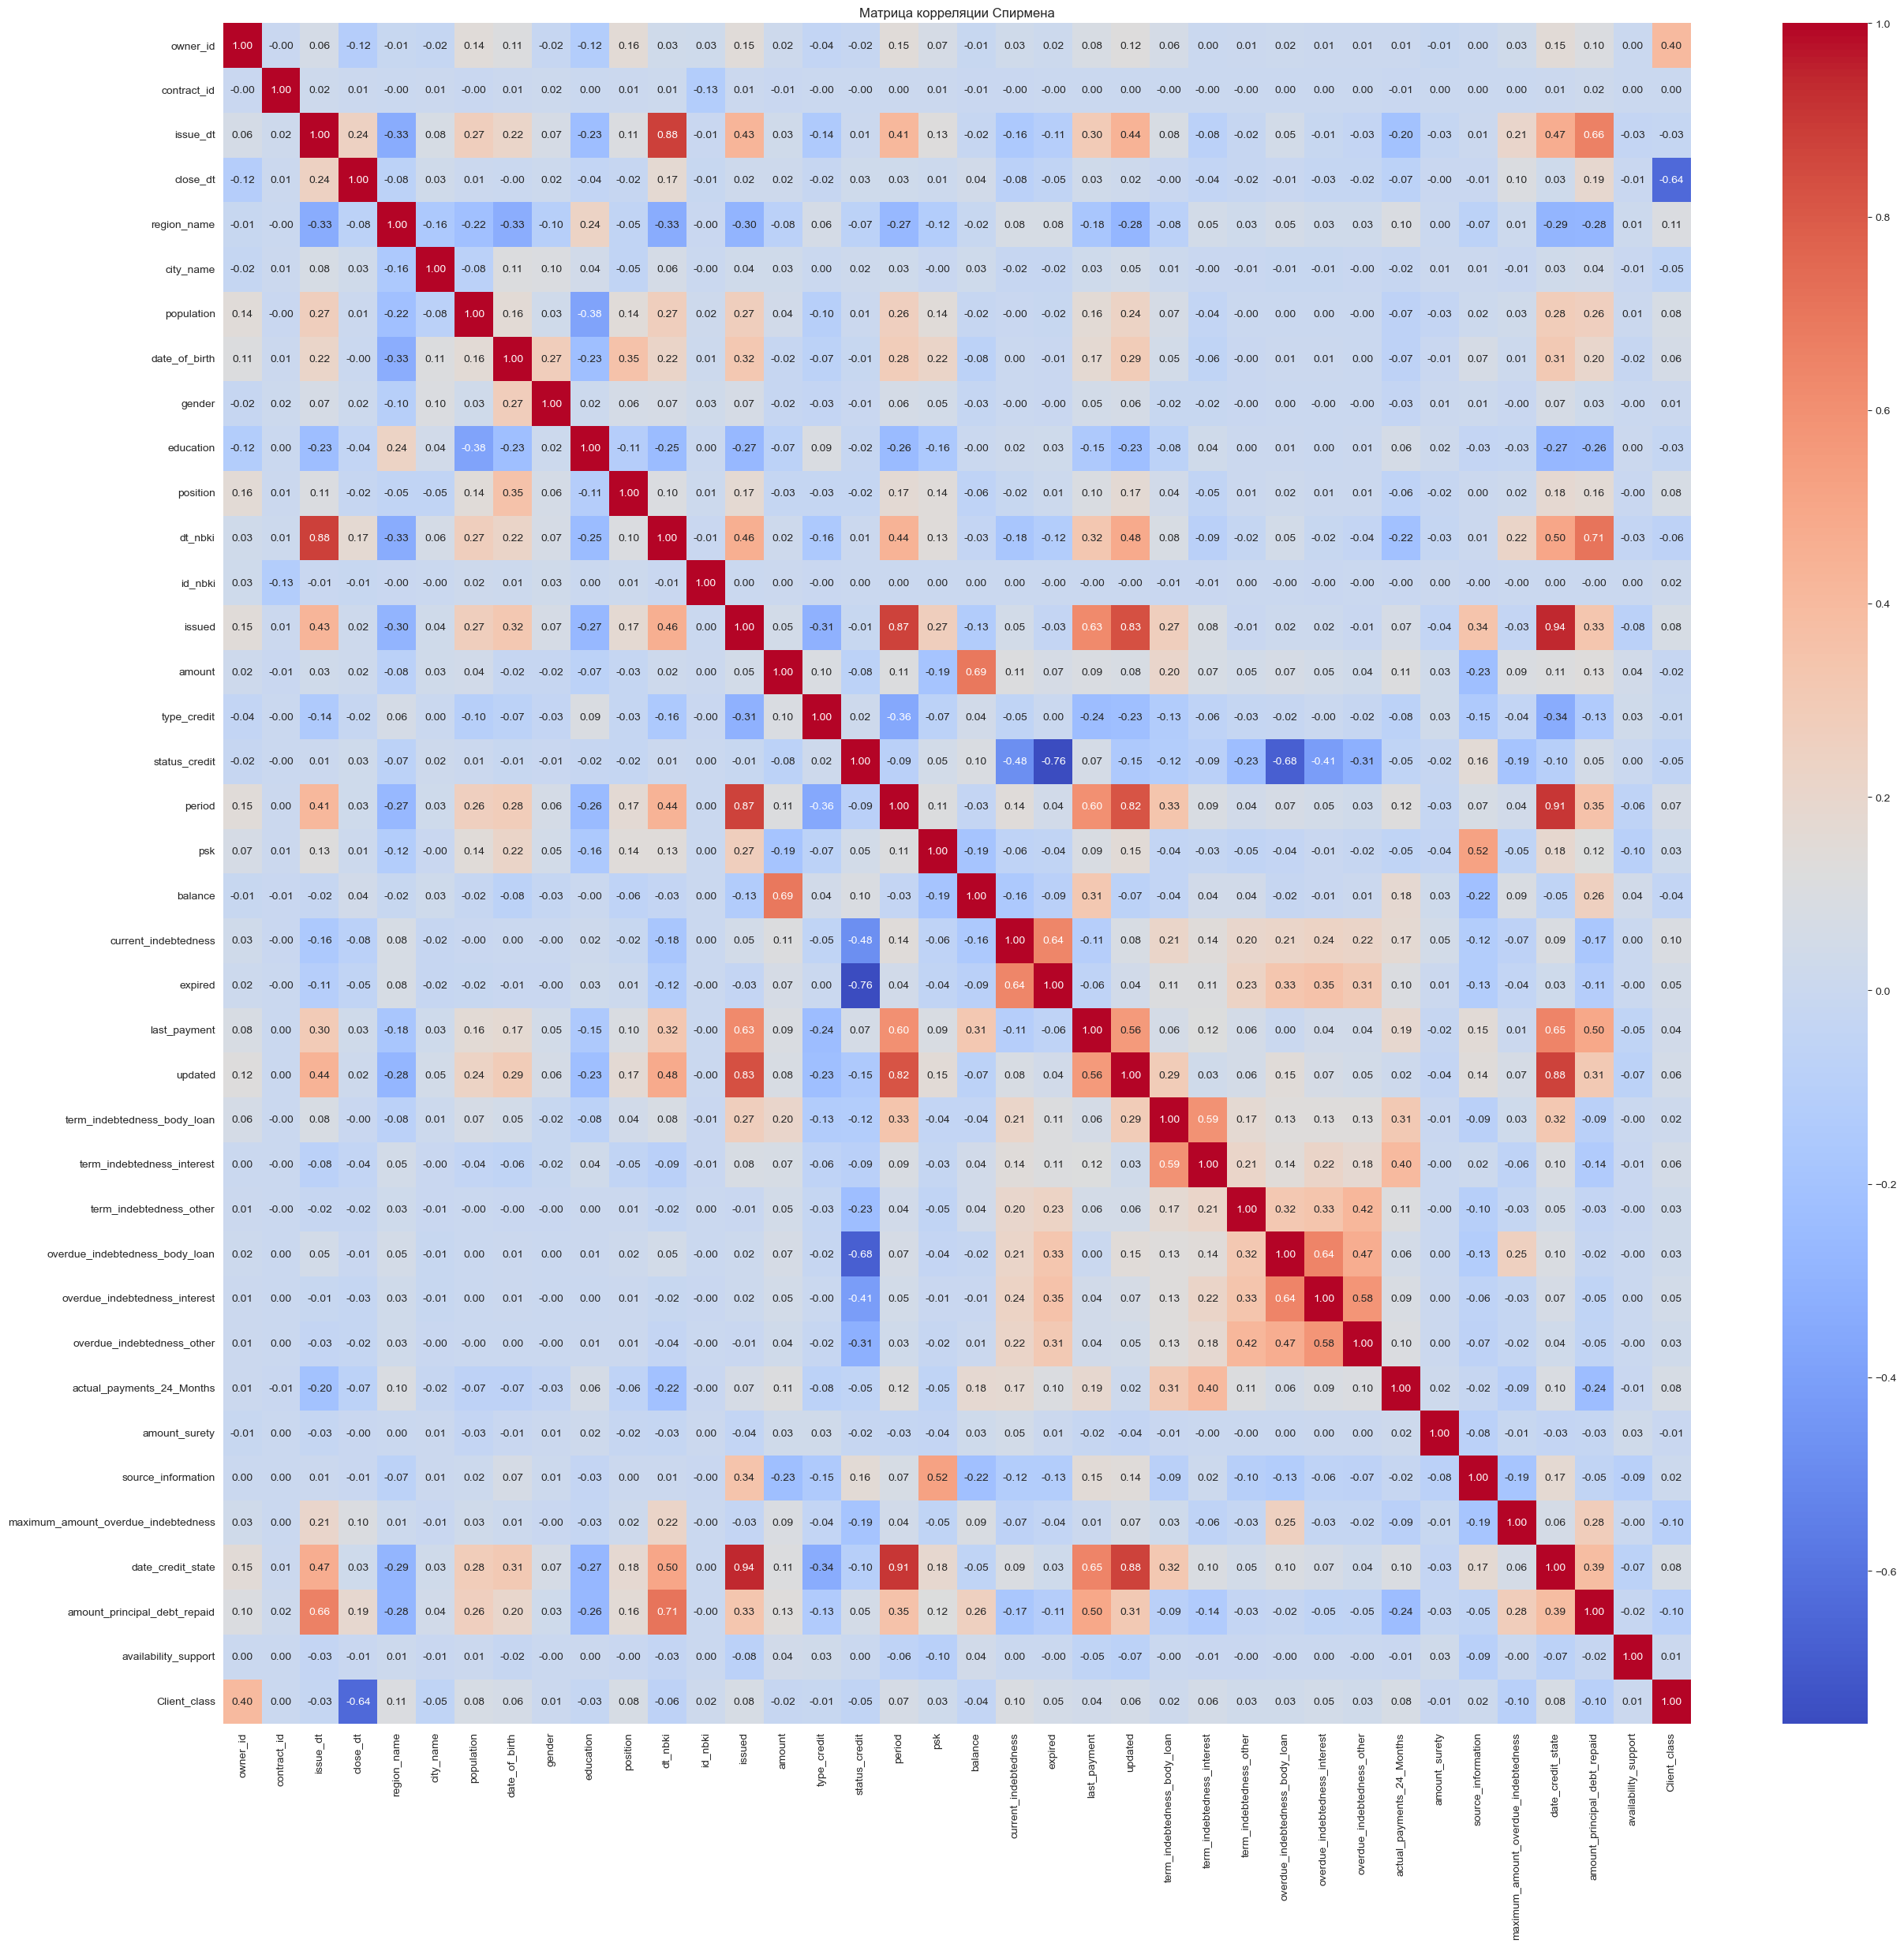

In [553]:
import seaborn as sns

corr_matrix = df.corr(method="spearman")
plt.figure(figsize=(30, 28))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Матрица корреляции Спирмена")
plt.show()

### Деление базы на train/test выборки

In [608]:
#test
def split(df, name):

  # Получаем уникальные значения из df
  df_unique_len = df['id_nbki'].nunique()
  df_unique = df['id_nbki'].unique()

  # Выбираем 20% случайных значений из df_unique
  df_sample = np.random.choice(df_unique, size=int(0.2*len(df_unique)), replace=False)

  # Фильтруем df по значениям в df_sample
  df_test = df[df['id_nbki'].isin(df_sample)]
  # Фильтруем df по значениям, которых нет в df_sample
  df_train = df[~df['id_nbki'].isin(df_sample)]


  data = [
      ['DataFrame', 'Уникальных значений', 'Отобрали значений', 'Train', 'Test'],
      [name, df_unique_len, df_sample.shape[0], df_train.shape, df_test.shape]
  ]

  table = tabulate(data, tablefmt='grid')
  print(table, end='\n\n')

  return df_train, df_test


df_train, df_test = split(df, 'df')

+-----------+---------------------+-------------------+---------------+--------------+
| DataFrame | Уникальных значений | Отобрали значений | Train         | Test         |
+-----------+---------------------+-------------------+---------------+--------------+
| df        | 28410               | 5682              | (1370542, 38) | (337531, 38) |
+-----------+---------------------+-------------------+---------------+--------------+



In [609]:
#val
def split1(df, name):

  # Получаем уникальные значения из df
  df_unique_len = df['id_nbki'].nunique()
  df_unique = df['id_nbki'].unique()

  # Выбираем 20% случайных значений из df_unique
  df_sample = np.random.choice(df_unique, size=int(0.2*len(df_unique)), replace=False)

  # Фильтруем df по значениям в df_sample
  df_val = df[df['id_nbki'].isin(df_sample)]
  # Фильтруем df по значениям, которых нет в df_sample
  df_train = df[~df['id_nbki'].isin(df_sample)]


  data = [
      ['DataFrame', 'Уникальных значений', 'Отобрали значений', 'Train', 'Val'],
      [name, df_unique_len, df_sample.shape[0], df_train.shape, df_val.shape]
  ]

  table = tabulate(data, tablefmt='grid')
  print(table, end='\n\n')

  return df_train, df_val


df_train, df_val = split1(df_train, 'df')

+-----------+---------------------+-------------------+---------------+--------------+
| DataFrame | Уникальных значений | Отобрали значений | Train         | Val          |
+-----------+---------------------+-------------------+---------------+--------------+
| df        | 22728               | 4545              | (1106976, 38) | (263566, 38) |
+-----------+---------------------+-------------------+---------------+--------------+



In [610]:
print(df.shape)
print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(1708073, 38)
(1106976, 38)
(263566, 38)
(337531, 38)


In [611]:
# сохранение train выборки
df_train.to_csv('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/df_4_train_norm.csv', index=False)

In [612]:
# сохранение val выборки
df_val.to_csv('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/df_4_val_norm.csv', index=False)

In [613]:
# сохранение test выборки
df_test.to_csv('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/df_4_test_norm.csv', index=False)

### Загрузка

In [5]:
# загрузка обучающей
df_train = pd.read_csv('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/df_4_train_norm.csv')


In [630]:
df_train.head()

,owner_id,contract_id,issue_dt,close_dt,region_name,city_name,population,date_of_birth,gender,education,position,dt_nbki,id_nbki,issued,amount,type_credit,status_credit,period,psk,balance,current_indebtedness,expired,last_payment,updated,term_indebtedness_body_loan,term_indebtedness_interest,term_indebtedness_other,overdue_indebtedness_body_loan,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_Months,amount_surety,source_information,maximum_amount_overdue_indebtedness,date_credit_state,amount_principal_debt_repaid,availability_support,Client_class
0,104,23492,1665964800,1668816000,3,468,182291,373161600,0,1,20,1665964800,3330,1148688000,0.00,12,2,2197584000,0.000,141531.65,0.0,0.0,1421280000,1660608000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,1421280000,140070.97,0,0
1,104,23492,1665964800,1668816000,3,468,182291,373161600,0,1,20,1665964800,3330,1370476800,168000.00,11,2,1529280000,0.000,268860.28,0.0,0.0,1529280000,1529452800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3240.15,1529280000,168000.00,0,0
2,104,23492,1665964800,1668816000,3,468,182291,373161600,0,1,20,1665964800,3330,1418860800,29356.04,21,2,1450310400,40.998,39779.33,0.0,0.0,1450310400,1451433600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,1450310400,29356.04,0,0
3,104,23492,1665964800,1668816000,3,468,182291,373161600,0,1,20,1665964800,3330,1447372800,15620.00,21,2,1479081600,0.000,0.00,0.0,0.0,1476316800,1476316800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1157.42,1476316800,0.00,0,0
4,104,23492,1665964800,1668816000,3,468,182291,373161600,0,1,20,1665964800,3330,1449446400,32000.00,12,2,1633046400,29.768,186130.59,0.0,0.0,1629072000,1633046400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,1633046400,128642.19,0,0


In [6]:
# загрузка validation
df_val = pd.read_csv('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/df_4_val_norm.csv')


In [631]:
df_val.head()

,owner_id,contract_id,issue_dt,close_dt,region_name,city_name,population,date_of_birth,gender,education,position,dt_nbki,id_nbki,issued,amount,type_credit,status_credit,period,psk,balance,current_indebtedness,expired,last_payment,updated,term_indebtedness_body_loan,term_indebtedness_interest,term_indebtedness_other,overdue_indebtedness_body_loan,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_Months,amount_surety,source_information,maximum_amount_overdue_indebtedness,date_credit_state,amount_principal_debt_repaid,availability_support,Client_class
165,488,23540,1665532800,1667865600,3,468,182291,541036800,0,1,19,1665532800,11425,1367971200,32624.5,21,2,1462752000,0.000,0.00,0.0,0.0,1462752000,1462752000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,1462752000,0.00,0,0
166,488,23540,1665532800,1667865600,3,468,182291,541036800,0,1,19,1665532800,11425,1369699200,118000.0,11,2,1494115200,0.000,0.00,0.0,0.0,1473379200,1473465600,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2323.03,1473379200,0.00,0,0
167,488,23540,1665532800,1667865600,3,468,182291,541036800,0,1,19,1665532800,11425,1369699200,25000.0,12,2,4102444800,20.450,330309.86,0.0,0.0,1663718400,1664323200,24966.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3574.75,1664323200,273827.76,0,0
168,488,23540,1665532800,1667865600,3,468,182291,541036800,0,1,19,1665532800,11425,1382400000,25000.0,12,2,1546473600,53.706,69013.20,0.0,0.0,1542499200,1546732800,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,1546473600,50208.45,0,0
169,488,23540,1665532800,1667865600,3,468,182291,541036800,0,1,19,1665532800,11425,1402444800,94000.0,11,2,1526860800,0.000,0.00,0.0,0.0,1475020800,1475107200,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1993.49,1475020800,0.00,0,0


In [7]:
# загрузка тестовой
df_test = pd.read_csv('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/df_4_test_norm.csv')

In [632]:
df_test.head()

,owner_id,contract_id,issue_dt,close_dt,region_name,city_name,population,date_of_birth,gender,education,position,dt_nbki,id_nbki,issued,amount,type_credit,status_credit,period,psk,balance,current_indebtedness,expired,last_payment,updated,term_indebtedness_body_loan,term_indebtedness_interest,term_indebtedness_other,overdue_indebtedness_body_loan,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_Months,amount_surety,source_information,maximum_amount_overdue_indebtedness,date_credit_state,amount_principal_debt_repaid,availability_support,Client_class
59,105,168,1666396800,1666656000,3,468,182291,347932800,0,1,19,1666396800,21458,1326758400,34600.00,21,2,1516320000,0.00,70598.72,0.0,0.0,1423440000,1664409600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,8883.26,1516233600,34600.00,0,0
60,105,168,1666396800,1666656000,3,468,182291,347932800,0,1,19,1666396800,21458,1334620800,56818.18,11,2,1395964800,0.00,76740.93,0.0,0.0,1444262400,1445904000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,34273.55,1445904000,51944.63,0,0
61,105,168,1666396800,1666656000,3,468,182291,347932800,0,1,19,1666396800,21458,1352851200,0.00,12,2,4102444800,40.26,257812.69,0.0,0.0,1380758400,1602720000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,226892.69,1602720000,200865.28,0,0
62,105,168,1666396800,1666656000,3,468,182291,347932800,0,1,19,1666396800,21458,1326758400,13153.78,12,0,2042409600,0.00,32657.83,0.0,0.0,1515456000,1663891200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4287.00,1661472000,18135.43,0,0
63,105,168,1666396800,1666656000,3,468,182291,347932800,0,1,19,1666396800,21458,1436400000,148350.00,21,2,1752019200,19.00,28395.00,0.0,0.0,1468022400,1469577600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,414.72,1469577600,4875.02,0,0


In [38]:
#df = pd.read_csv('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/df_cutted_wo_norm.scv')

In [628]:
df.head()

,owner_id,contract_id,issue_dt,close_dt,region_name,city_name,population,date_of_birth,gender,education,position,dt_nbki,id_nbki,issued,amount,type_credit,status_credit,period,psk,balance,current_indebtedness,expired,last_payment,updated,term_indebtedness_body_loan,term_indebtedness_interest,term_indebtedness_other,overdue_indebtedness_body_loan,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_Months,amount_surety,source_information,maximum_amount_overdue_indebtedness,date_credit_state,amount_principal_debt_repaid,availability_support,Client_class
0,104,23492,1665964800,1668816000,3,468,182291,373161600,0,1,20,1665964800,3330,1148688000,0.00,12,2,2197584000,0.000,141531.65,0.0,0.0,1421280000,1660608000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,1421280000,140070.97,0,0
1,104,23492,1665964800,1668816000,3,468,182291,373161600,0,1,20,1665964800,3330,1370476800,168000.00,11,2,1529280000,0.000,268860.28,0.0,0.0,1529280000,1529452800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3240.15,1529280000,168000.00,0,0
2,104,23492,1665964800,1668816000,3,468,182291,373161600,0,1,20,1665964800,3330,1418860800,29356.04,21,2,1450310400,40.998,39779.33,0.0,0.0,1450310400,1451433600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,1450310400,29356.04,0,0
3,104,23492,1665964800,1668816000,3,468,182291,373161600,0,1,20,1665964800,3330,1447372800,15620.00,21,2,1479081600,0.000,0.00,0.0,0.0,1476316800,1476316800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1157.42,1476316800,0.00,0,0
4,104,23492,1665964800,1668816000,3,468,182291,373161600,0,1,20,1665964800,3330,1449446400,32000.00,12,2,1633046400,29.768,186130.59,0.0,0.0,1629072000,1633046400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,1633046400,128642.19,0,0


In [629]:
df['Client_class'].unique()

[0, 1, 2, 3]
Categories (4, int64): [0, 1, 2, 3]

### Переводим в numpy array

#### разделяем датасет на признаки (х) и целевую переменную (y)

#### 1. Работа на перемешанных данных

In [39]:
x = df.drop('Client_class', axis=1)
y = np.array(df['Client_class'])

In [40]:
y = np.subtract(y, 1)  #если классы идут с 1

In [41]:
print(x.shape)
print(y.shape)

(399905, 41)
(399905,)


In [392]:
print('Общая база', x,y)

Общая база         owner_id  contract_id  mark_kind    issue_dt    close_dt  region_name  \
0              1         3659          1  1608595200  1609286400            3   
1              1         3659          1  1608595200  1609286400            3   
2              1         3659          1  1608595200  1609286400            3   
3              1         3659          1  1608595200  1609286400            3   
4              1         3659          1  1608595200  1609286400            3   
...          ...          ...        ...         ...         ...          ...   
399900      3750         3538          0  1677888000           0            3   
399901      3750         3538          0  1677888000           0            3   
399902      3750         3538          0  1677888000           0            3   
399903      3750         3538          0  1677888000           0            3   
399904      3750         3538          0  1677888000           0            3   

        city_nam

In [42]:
scaler = StandardScaler(with_mean=False) # Нормализуем данные
scaler.fit(x)
x = scaler.transform(x)
print(x) # Посмотрим на нормализованные данные
print(np.unique(y))

[[ 6.42238057e-04  2.26534873e+00  2.87942886e+00 ...  1.10211491e+00
   0.00000000e+00  0.00000000e+00]
 [ 6.42238057e-04  2.26534873e+00  2.87942886e+00 ...  1.10089150e+00
   0.00000000e+00  0.00000000e+00]
 [ 6.42238057e-04  2.26534873e+00  2.87942886e+00 ...  1.09937681e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 2.40839271e+00  2.19043559e+00  0.00000000e+00 ... -1.48964363e+00
   4.33898245e-01  0.00000000e+00]
 [ 2.40839271e+00  2.19043559e+00  0.00000000e+00 ... -1.48964363e+00
   2.04552030e-01  0.00000000e+00]
 [ 2.40839271e+00  2.19043559e+00  0.00000000e+00 ... -1.48964363e+00
   0.00000000e+00  0.00000000e+00]]
[0 1 2 3]


In [43]:
print('Размер y:',y.shape)

Размер y: (399905,)


In [44]:
from sklearn.model_selection import train_test_split

# Разделение на тренировочную, проверочную и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


In [395]:
x,y


(        owner_id  contract_id  mark_kind    issue_dt    close_dt  region_name  \
 0              1         3659          1  1608595200  1609286400            3   
 1              1         3659          1  1608595200  1609286400            3   
 2              1         3659          1  1608595200  1609286400            3   
 3              1         3659          1  1608595200  1609286400            3   
 4              1         3659          1  1608595200  1609286400            3   
 ...          ...          ...        ...         ...         ...          ...   
 399900      3750         3538          0  1677888000           0            3   
 399901      3750         3538          0  1677888000           0            3   
 399902      3750         3538          0  1677888000           0            3   
 399903      3750         3538          0  1677888000           0            3   
 399904      3750         3538          0  1677888000           0            3   
 
         city_

In [45]:

from keras.utils import to_categorical

# Преобразование выходных данных в форму (255939, 4)
y_train = to_categorical(y_train, num_classes=4)
y_val = to_categorical(y_val, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)


In [46]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print()
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(255939, 41)
(63985, 41)
(79981, 41)

(255939, 4)
(63985, 4)
(79981, 4)


#### 2. Неперемешанные данные

In [618]:
x_train = df_train.drop('Client_class', axis=1)
y_train = np.array(df_train['Client_class'])

In [619]:
x_val = df_val.drop('Client_class', axis=1)
y_val = np.array(df_val['Client_class'])

In [620]:
x_test = df_test.drop('Client_class', axis=1)
y_test = np.array(df_test['Client_class'])

In [11]:
y_train = np.subtract(y_train, 1)  #если классы идут с 1
y_val = np.subtract(y_val, 1)
y_test = np.subtract(y_test, 1)

In [621]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((1106976, 37), (1106976,), (263566, 37), (263566,), (337531, 37), (337531,))

In [ ]:
print ('Обучающая база: ', x_train, y_train)
print ()
print ('Валидационная база: ', x_val, y_val)
print ()
print ('Тестовая база', x_test, y_test)

In [622]:
scaler = StandardScaler(with_mean=False) # Нормализуем данные
scaler.fit(x_train)
x_train = scaler.transform(x_train)
print(x_train) # Посмотрим на нормализованные данные
print(np.unique(y_train))

[[1.24410549e-02 2.65091432e+00 7.24583178e+01 ... 1.69114082e+01
  1.53757325e+00 0.00000000e+00]
 [1.24410549e-02 2.65091432e+00 7.24583178e+01 ... 1.81964696e+01
  1.84415305e+00 0.00000000e+00]
 [1.24410549e-02 2.65091432e+00 7.24583178e+01 ... 1.72568327e+01
  3.22244230e-01 0.00000000e+00]
 ...
 [2.61764580e+00 3.28486786e+00 7.30783584e+01 ... 1.97765811e+01
  7.68397103e-02 0.00000000e+00]
 [2.61764580e+00 3.28486786e+00 7.30783584e+01 ... 1.97940579e+01
  8.78168117e-02 0.00000000e+00]
 [2.61764580e+00 3.28486786e+00 7.30783584e+01 ... 1.97961140e+01
  5.48855073e-02 0.00000000e+00]]
[0 1 2 3]


In [623]:
#scaler = StandardScaler(with_mean=False) # Нормализуем данные
scaler.fit(x_val)
x_val = scaler.transform(x_val)
print(x_val) # Посмотрим на нормализованные данные
print(np.unique(y_val))

[[5.89484621e-02 2.70005129e+00 7.20842553e+01 ... 1.75928828e+01
  0.00000000e+00 0.00000000e+00]
 [5.89484621e-02 2.70005129e+00 7.20842553e+01 ... 1.77206988e+01
  0.00000000e+00 0.00000000e+00]
 [5.89484621e-02 2.70005129e+00 7.20842553e+01 ... 2.00172299e+01
  1.36096464e+00 0.00000000e+00]
 ...
 [2.64301711e+00 1.57965617e+00 7.18711100e+01 ... 1.99122753e+01
  0.00000000e+00 0.00000000e+00]
 [2.64301711e+00 1.57965617e+00 7.18711100e+01 ... 1.99122753e+01
  0.00000000e+00 0.00000000e+00]
 [2.64301711e+00 1.57965617e+00 7.18711100e+01 ... 1.99455283e+01
  0.00000000e+00 0.00000000e+00]]
[0 1 2 3]


In [624]:
#scaler = StandardScaler(with_mean=False) # Нормализуем данные
scaler.fit(x_test)
x_test = scaler.transform(x_test)
print(x_test) # Посмотрим на нормализованные данные
print(np.unique(y_test))

[[1.26542674e-02 1.92264507e-02 7.27427665e+01 ... 1.87171311e+01
  2.89348781e-01 0.00000000e+00]
 [1.26542674e-02 1.92264507e-02 7.27427665e+01 ... 1.78489481e+01
  4.34396397e-01 0.00000000e+00]
 [1.26542674e-02 1.92264507e-02 7.27427665e+01 ... 1.97847617e+01
  1.67977236e+00 0.00000000e+00]
 ...
 [2.63510054e+00 8.66563598e-01 7.10266904e+01 ... 1.98050264e+01
  0.00000000e+00 0.00000000e+00]
 [2.63510054e+00 8.66563598e-01 7.10266904e+01 ... 1.94541268e+01
  0.00000000e+00 0.00000000e+00]
 [2.63510054e+00 8.66563598e-01 7.10266904e+01 ... 1.95895805e+01
  0.00000000e+00 0.00000000e+00]]
[0 1 2 3]


In [625]:

from keras.utils import to_categorical

# Преобразование выходных данных в форму (255939, 4)
y_train = to_categorical(y_train, num_classes=4)
y_val = to_categorical(y_val, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)


2023-08-26 18:29:20.408672: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [647]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print()
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(1106976, 37)
(263566, 37)
(337531, 37)

(1106976, 4)
(263566, 4)
(337531, 4)


In [648]:
x_test, y_test

(array([[1.26542674e-02, 1.92264507e-02, 7.27427665e+01, ...,
         1.87171311e+01, 2.89348781e-01, 0.00000000e+00],
        [1.26542674e-02, 1.92264507e-02, 7.27427665e+01, ...,
         1.78489481e+01, 4.34396397e-01, 0.00000000e+00],
        [1.26542674e-02, 1.92264507e-02, 7.27427665e+01, ...,
         1.97847617e+01, 1.67977236e+00, 0.00000000e+00],
        ...,
        [2.63510054e+00, 8.66563598e-01, 7.10266904e+01, ...,
         1.98050264e+01, 0.00000000e+00, 0.00000000e+00],
        [2.63510054e+00, 8.66563598e-01, 7.10266904e+01, ...,
         1.94541268e+01, 0.00000000e+00, 0.00000000e+00],
        [2.63510054e+00, 8.66563598e-01, 7.10266904e+01, ...,
         1.95895805e+01, 0.00000000e+00, 0.00000000e+00]]),
 array([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]], dtype=float32))

In [633]:
# Сохранение x_train, y_train
np.save('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/x_train.npy', x_train)

np.save('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/y_train.npy', y_train)


In [634]:
# Сохранение x_val, y_val
np.save('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/x_val.npy', x_val)

np.save('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/y_val.npy', y_val)


In [635]:
# Сохранение x_test, y_test
np.save('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/x_test.npy', x_test)

np.save('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/y_test.npy', y_test)


### Загрузка выборочных массивов

In [7]:
# Загрузка train
x_train = np.load('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/4 класса/x_train.npy')

y_train = np.load('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/4 класса/y_train.npy')


In [8]:
# Загрузка val
x_val = np.load('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/4 класса/x_val.npy')

y_val = np.load('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/4 класса/y_val.npy')


In [9]:
# Загрузка test
x_test = np.load('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/4 класса/x_test.npy')

y_test = np.load('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/4 класса/y_test.npy')


### Донормирование баз

In [10]:
from sklearn.preprocessing import QuantileTransformer
qts = QuantileTransformer(output_distribution='uniform', random_state=42)
qts.fit(np.vstack((x_train, x_val, x_test)))
x_train = qts.transform(x_train)
x_val = qts.transform(x_val)
x_test = qts.transform(x_test)

In [11]:
print(x_train)
print(np.unique(y_train))


[[0.10740576 0.77432642 0.76276276 ... 0.02997289 0.99077872 0.        ]
 [0.10740576 0.77432642 0.76276276 ... 0.18468468 0.99231672 0.        ]
 [0.10740576 0.77432642 0.76276276 ... 0.0433433  0.96543064 0.        ]
 ...
 [0.83640999 0.94836049 0.95795796 ... 0.80680681 0.83233233 0.        ]
 [0.83640999 0.94836049 0.95795796 ... 0.82282282 0.84884885 0.        ]
 [0.83640999 0.94836049 0.95795796 ... 0.82482482 0.78928929 0.        ]]
[0. 1.]


### Эксперимент 1. Параметры - Dense: 896, 160, 160. Selu. Adam(lr=0.005)

In [677]:
from keras.models import Sequential
from keras.layers import Dense


# Создание модели нейронной сети
#model = Sequential()
#model.add(Dense(544, input_dim=x_train.shape[1], activation='elu'))
#model.add(BatchNormalization())
#model.add(Dense(384, activation='elu'))
#model.add(Dense(4, activation='softmax'))

# Создание модели нейронной сети
model = Sequential([
    BatchNormalization(input_dim=x_train.shape[1]),
    Dense(896, activation='selu'),
    Dropout(0.5),
    
    BatchNormalization(),
    Dense(160, activation='selu'),
    Dropout(0.5),
    
    BatchNormalization(),
    Dense(160, activation='selu'),
    Dropout(0.5),
    
    Dense(4, activation='softmax')
])


model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_12 (Ba  (None, 37)                148       
 tchNormalization)                                               
                                                                 
 dense_15 (Dense)            (None, 896)               34048     
                                                                 
 dropout_12 (Dropout)        (None, 896)               0         
                                                                 
 batch_normalization_13 (Ba  (None, 896)               3584      
 tchNormalization)                                               
                                                                 
 dense_16 (Dense)            (None, 160)               143520    
                                                                 
 dropout_13 (Dropout)        (None, 160)              

In [678]:
# Компиляция модели
optimizer = Adam(learning_rate=0.005)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Обучение модели
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=30, batch_size=256)


Epoch 1/30
4325/4325 [==============================] - 55s 12ms/step - loss: 0.4226 - accuracy: 0.8259 - val_loss: 1.3192 - val_accuracy: 0.6786
Epoch 2/30
4325/4325 [==============================] - 53s 12ms/step - loss: 0.3142 - accuracy: 0.8673 - val_loss: 1.0486 - val_accuracy: 0.7117
Epoch 3/30
4325/4325 [==============================] - 53s 12ms/step - loss: 0.2893 - accuracy: 0.8764 - val_loss: 1.4433 - val_accuracy: 0.7187
Epoch 4/30
4325/4325 [==============================] - 52s 12ms/step - loss: 0.2781 - accuracy: 0.8802 - val_loss: 1.0871 - val_accuracy: 0.7001
Epoch 5/30
4325/4325 [==============================] - 50s 12ms/step - loss: 0.2693 - accuracy: 0.8837 - val_loss: 1.6903 - val_accuracy: 0.7132
Epoch 6/30
4325/4325 [==============================] - 52s 12ms/step - loss: 0.2633 - accuracy: 0.8860 - val_loss: 1.1615 - val_accuracy: 0.6771
Epoch 7/30
4325/4325 [==============================] - 55s 13ms/step - loss: 0.2557 - accuracy: 0.8889 - val_loss: 1.4771 -

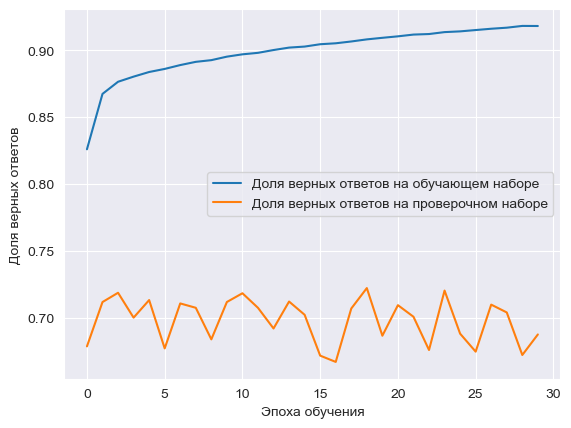

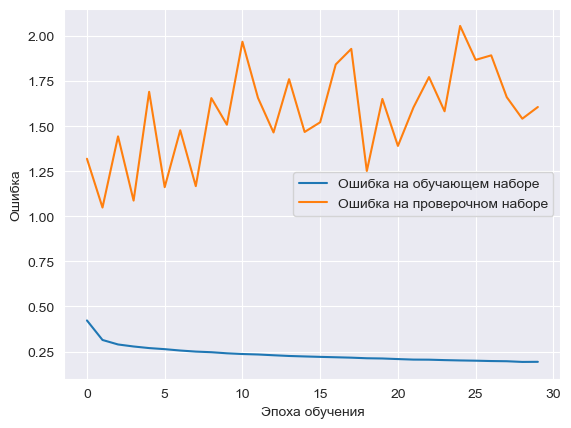

In [679]:
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

### Оценка качества сети

In [681]:
# Запустить, если размерность y_test 0)
#y_test = to_categorical(y_test, num_classes=4)
y_test.shape

(337531, 4)

In [682]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

10548/10548 [==============================] - 16s 2ms/step - loss: 2.0856 - accuracy: 0.7108
Loss: 2.085578441619873
Accuracy: 0.7108206152915955


In [683]:
# Получение предсказаний на тестовой выборке
predict1 = model.predict(x_test)

# Вывод предсказаний
#print(predict1)

10548/10548 [==============================] - 15s 1ms/step


In [684]:
# Предсказание на тестовой выборке
predict2 = model.evaluate(x_test, y_test)

# Вывод предсказаний
print(predict2)


10548/10548 [==============================] - 16s 2ms/step - loss: 2.0856 - accuracy: 0.7108
[2.085578441619873, 0.7108206152915955]


In [685]:
# Преобразование предсказаний в индексы классов
predicted_classes = np.argmax(predict1, axis=1)

# Вывод предсказанных классов
print(predicted_classes)

[1 1 1 ... 3 3 2]


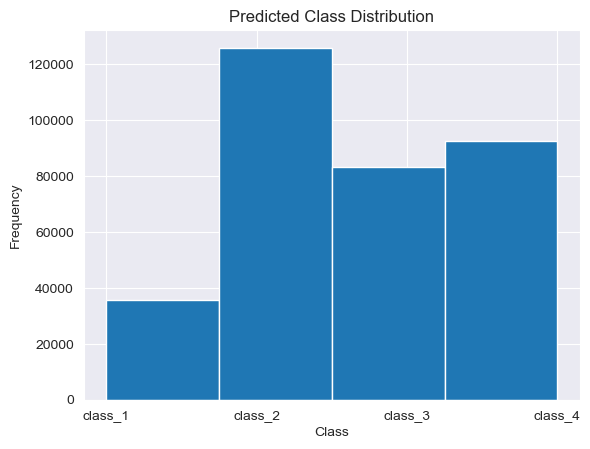

In [686]:
import matplotlib.pyplot as plt


# Определение классов
classes = ['class_1', 'class_2', 'class_3', 'class_4']

# Преобразование предсказаний в одномерный массив
predictions_classes = np.argmax(predict1, axis=1)

# Создание гистограммы
plt.hist(predictions_classes, bins=len(classes))
plt.xticks(range(len(classes)), classes)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Predicted Class Distribution')

# Отображение гистограммы
plt.show()

In [687]:
predictions = np.argmax(predict2)
print(classes[predictions])

class_1


10548/10548 [==============================] - 14s 1ms/step
[[30619 36505 16046     1]
 [ 5022 81253  2576     0]
 [  136  8227 55512 20104]
 [    0     0  8990 72540]]


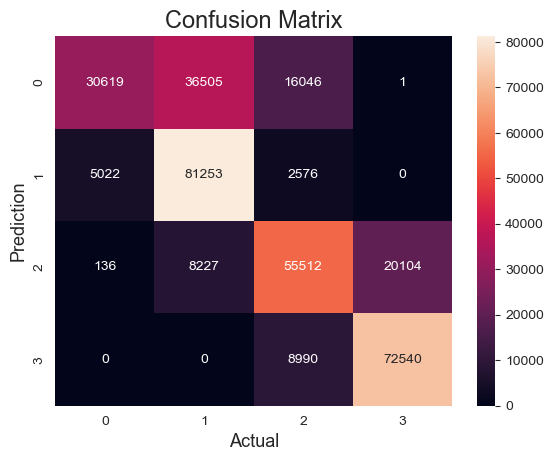

Accuracy   : 0.7108206357341992


In [688]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# compute the confusion matrix
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)

### Сохранение модели

In [689]:
# Сохранение модели
model.save('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/4 класса/model.keras')

In [ ]:
# Загрузка модели
from tensorflow.keras.models import load_model

model = load_model('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/4 класса/model.keras')

### Эксперимент 3 - Параметры: 768, 224, RMSprop, sigmoid

In [690]:
from keras.models import Sequential
from keras.layers import Dense
#from keras.layers import BatchNormalization
from keras.optimizers import RMSprop


from keras.optimizers import RMSprop


# Создание экземпляра оптимизатора
optimizer = RMSprop(learning_rate=0.001, rho=0.9)

# Создание модели нейронной сети
model3 = Sequential()
model3.add(BatchNormalization(input_dim=x_train.shape[1]))
model3.add(Dense(768, activation='sigmoid'))
model3.add(Dropout(0.5))

model3.add(BatchNormalization())
model3.add(Dense(224, activation='sigmoid'))
model3.add(Dense(4, activation='softmax'))

# Компиляция модели
model3.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Обучение модели
history = model3.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=30, batch_size=256)


Epoch 1/30
4325/4325 [==============================] - 39s 9ms/step - loss: 0.4507 - accuracy: 0.8038 - val_loss: 1.3716 - val_accuracy: 0.6669
Epoch 2/30
4325/4325 [==============================] - 42s 10ms/step - loss: 0.2934 - accuracy: 0.8746 - val_loss: 1.5599 - val_accuracy: 0.6752
Epoch 3/30
4325/4325 [==============================] - 40s 9ms/step - loss: 0.2357 - accuracy: 0.9018 - val_loss: 1.8381 - val_accuracy: 0.6495
Epoch 4/30
4325/4325 [==============================] - 39s 9ms/step - loss: 0.1953 - accuracy: 0.9218 - val_loss: 1.7937 - val_accuracy: 0.6677
Epoch 5/30
4325/4325 [==============================] - 39s 9ms/step - loss: 0.1676 - accuracy: 0.9346 - val_loss: 1.9820 - val_accuracy: 0.6841
Epoch 6/30
4325/4325 [==============================] - 39s 9ms/step - loss: 0.1477 - accuracy: 0.9435 - val_loss: 1.9988 - val_accuracy: 0.6590
Epoch 7/30
4325/4325 [==============================] - 40s 9ms/step - loss: 0.1347 - accuracy: 0.9494 - val_loss: 2.1469 - val_a

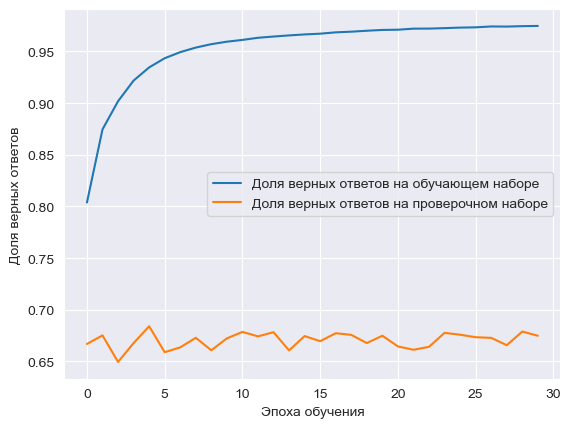

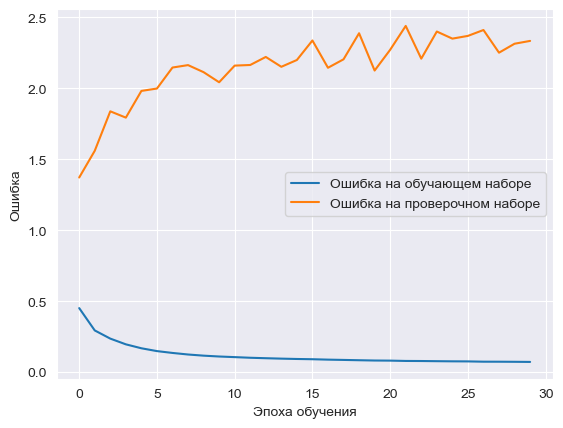

In [691]:
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [692]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_15 (Ba  (None, 37)                148       
 tchNormalization)                                               
                                                                 
 dense_19 (Dense)            (None, 768)               29184     
                                                                 
 dropout_15 (Dropout)        (None, 768)               0         
                                                                 
 batch_normalization_16 (Ba  (None, 768)               3072      
 tchNormalization)                                               
                                                                 
 dense_20 (Dense)            (None, 224)               172256    
                                                                 
 dense_21 (Dense)            (None, 4)                

In [694]:
# Запустить, если размерность y_test 0)
#y_test = to_categorical(y_test, num_classes=4)
y_test.shape

(337531, 4)

In [695]:
loss, accuracy = model3.evaluate(x_test, y_test, verbose=1)
print("Loss:", loss)
print("Accuracy:", accuracy)

10548/10548 [==============================] - 15s 1ms/step - loss: 4.2025 - accuracy: 0.6905
Loss: 4.202524185180664
Accuracy: 0.6904550790786743


In [696]:
# Получение предсказаний на тестовой выборке
predict1 = model3.predict(x_test)

# Вывод предсказаний
#print(predict1)

10548/10548 [==============================] - 13s 1ms/step


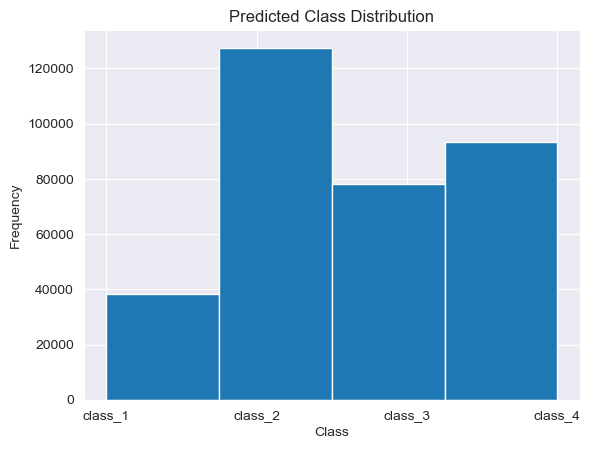

In [697]:
import matplotlib.pyplot as plt


# Определение классов
classes = ['class_1', 'class_2', 'class_3', 'class_4']

# Преобразование предсказаний в одномерный массив
predictions_flat = np.argmax(predict1, axis=1)

# Создание гистограммы
plt.hist(predictions_flat, bins=len(classes))
plt.xticks(range(len(classes)), classes)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Predicted Class Distribution')

# Отображение гистограммы
plt.show()

10548/10548 [==============================] - 13s 1ms/step
[[31276 36054 15841     0]
 [ 6378 79461  3012     0]
 [  760 12004 50114 21101]
 [    0     0  9331 72199]]


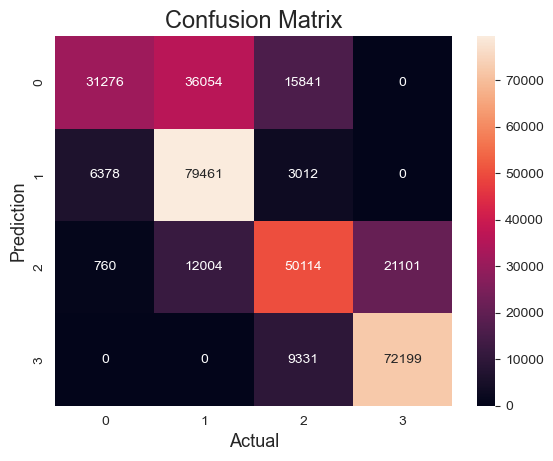

Accuracy   : 0.6904550989390604


In [698]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# compute the confusion matrix
y_pred=model3.predict(x_test)
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)

In [699]:
# Сохранение модели
model3.save('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/4 класса/model3.keras')

In [ ]:
# Загрузка модели
from tensorflow.keras.models import load_model

model3 = load_model('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/4 класса/model3.keras')

### Эксперимент 2 - Параметры: 864, 416, Selu, SGD, 256

In [700]:
from keras.models import Sequential
from keras.layers import Dense


# Создание модели нейронной сети
model2 = Sequential()
model2.add(Dense(864, input_dim=x_train.shape[1], activation='selu'))
#model2.add(BatchNormalization())
model2.add(Dense(416, activation='selu'))
model2.add(Dense(4, activation='softmax'))

# Компиляция модели
model2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Обучение модели
history = model2.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=30, batch_size=256)


Epoch 1/30
4325/4325 [==============================] - 26s 6ms/step - loss: 1.5272 - accuracy: 0.3501 - val_loss: 1.1027 - val_accuracy: 0.5326
Epoch 2/30
4325/4325 [==============================] - 27s 6ms/step - loss: 1.1765 - accuracy: 0.4835 - val_loss: 0.8080 - val_accuracy: 0.5955
Epoch 3/30
4325/4325 [==============================] - 27s 6ms/step - loss: 0.9320 - accuracy: 0.5716 - val_loss: 0.7370 - val_accuracy: 0.6248
Epoch 4/30
4325/4325 [==============================] - 27s 6ms/step - loss: 0.8365 - accuracy: 0.6113 - val_loss: 0.8455 - val_accuracy: 0.5467
Epoch 5/30
4325/4325 [==============================] - 26s 6ms/step - loss: 0.7543 - accuracy: 0.6500 - val_loss: 0.7050 - val_accuracy: 0.6847
Epoch 6/30
4325/4325 [==============================] - 25s 6ms/step - loss: 0.6919 - accuracy: 0.6773 - val_loss: 0.7411 - val_accuracy: 0.6562
Epoch 7/30
4325/4325 [==============================] - 24s 5ms/step - loss: 0.6742 - accuracy: 0.6907 - val_loss: 0.9571 - val_ac

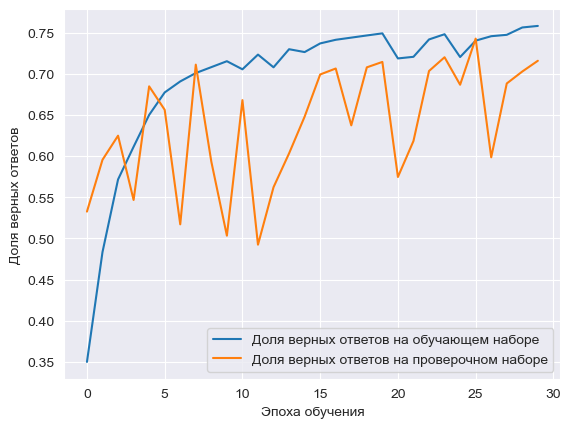

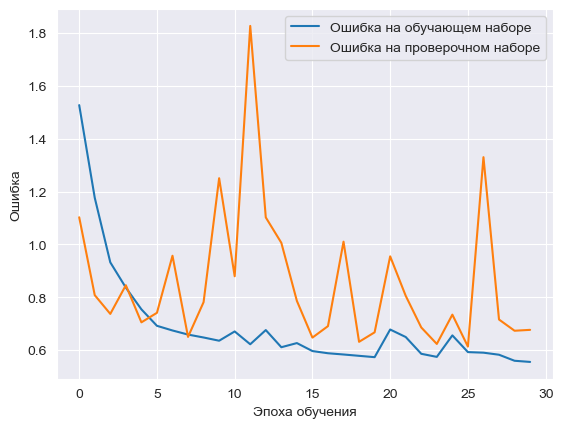

In [701]:
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [706]:
# Запустить, если размерность y_test 0)
#y_test = to_categorical(y_test, num_classes=4)
y_test.shape

(337531, 4)

In [704]:
loss, accuracy = model2.evaluate(x_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

10548/10548 [==============================] - 16s 1ms/step - loss: 0.6628 - accuracy: 0.7207
Loss: 0.6628367304801941
Accuracy: 0.7207189798355103


In [707]:
# Получение предсказаний на тестовой выборке
predict2 = model2.predict(x_test, y_test)

# Вывод предсказаний
#print(predict1)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

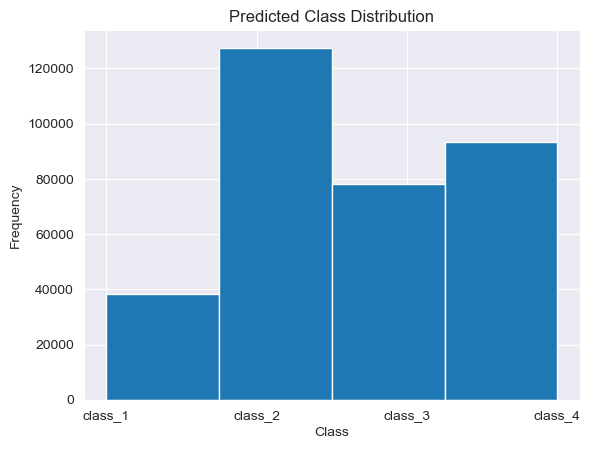

In [709]:
import matplotlib.pyplot as plt


# Определение классов
classes = ['class_1', 'class_2', 'class_3', 'class_4']

# Преобразование предсказаний в одномерный массив
predictions_flat = np.argmax(predict1, axis=1)

# Создание гистограммы
plt.hist(predictions_flat, bins=len(classes))
plt.xticks(range(len(classes)), classes)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Predicted Class Distribution')

# Отображение гистограммы
plt.show()

10548/10548 [==============================] - 14s 1ms/step
[[71403 10123  1644     1]
 [23121 55583 10146     1]
 [ 8108  5398 35266 35207]
 [    0     0   517 81013]]


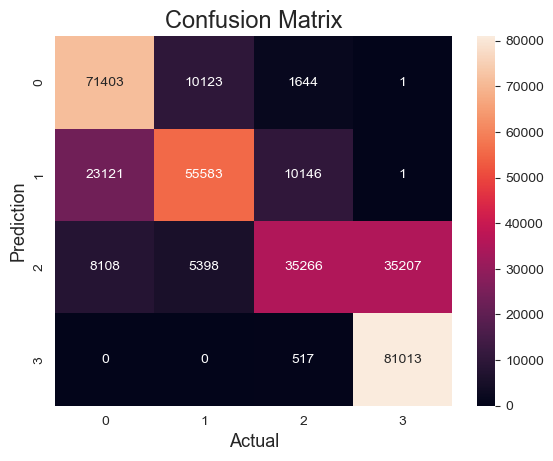

Accuracy   : 0.7207189858116736


In [710]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# compute the confusion matrix
y_pred=model2.predict(x_test)
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)

In [711]:
# Сохранение модели
model2.save('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/4 класса/model2.keras')

In [720]:
# Загрузка модели
from tensorflow.keras.models import load_model

model2 = load_model('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/4 класса/model2.keras')

### Подача модели 2 на дообучение. Параметры не меняются

In [721]:
# Компиляция модели
model2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Обучение модели
history = model2.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=50, batch_size=256)


Epoch 1/50
4325/4325 [==============================] - 28s 6ms/step - loss: 0.5496 - accuracy: 0.7613 - val_loss: 0.7936 - val_accuracy: 0.6472
Epoch 2/50
4325/4325 [==============================] - 30s 7ms/step - loss: 0.5460 - accuracy: 0.7631 - val_loss: 0.7586 - val_accuracy: 0.6417
Epoch 3/50
4325/4325 [==============================] - 28s 6ms/step - loss: 0.5420 - accuracy: 0.7652 - val_loss: 0.9740 - val_accuracy: 0.6266
Epoch 4/50
4325/4325 [==============================] - 28s 6ms/step - loss: 0.5415 - accuracy: 0.7655 - val_loss: 0.6135 - val_accuracy: 0.7283
Epoch 5/50
4325/4325 [==============================] - 26s 6ms/step - loss: 0.5368 - accuracy: 0.7684 - val_loss: 0.7736 - val_accuracy: 0.6464
Epoch 6/50
4325/4325 [==============================] - 27s 6ms/step - loss: 0.5328 - accuracy: 0.7703 - val_loss: 0.6272 - val_accuracy: 0.7406
Epoch 7/50
4325/4325 [==============================] - 28s 6ms/step - loss: 0.6286 - accuracy: 0.7366 - val_loss: 0.7665 - val_ac

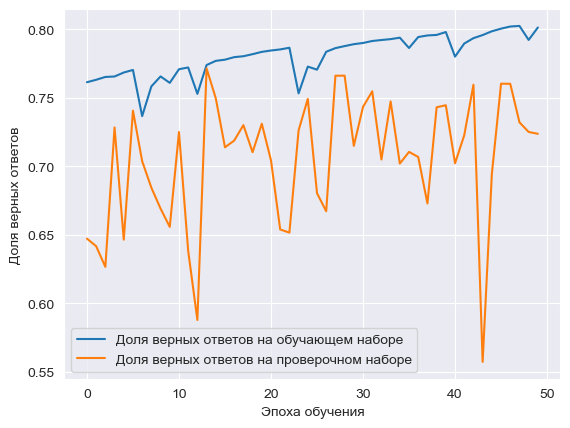

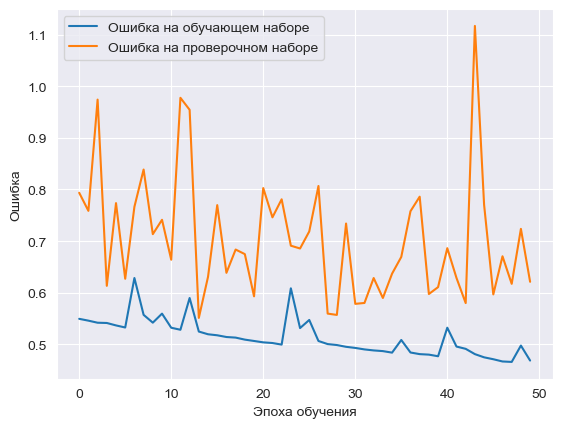

In [722]:
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [729]:
# Запустить, если размерность y_test 0)
#y_test = to_categorical(y_test, num_classes=4)
y_test.shape

(337531, 4)

In [725]:
loss, accuracy = model2.evaluate(x_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

10548/10548 [==============================] - 16s 1ms/step - loss: 0.6432 - accuracy: 0.7251
Loss: 0.6432024836540222
Accuracy: 0.7251155972480774


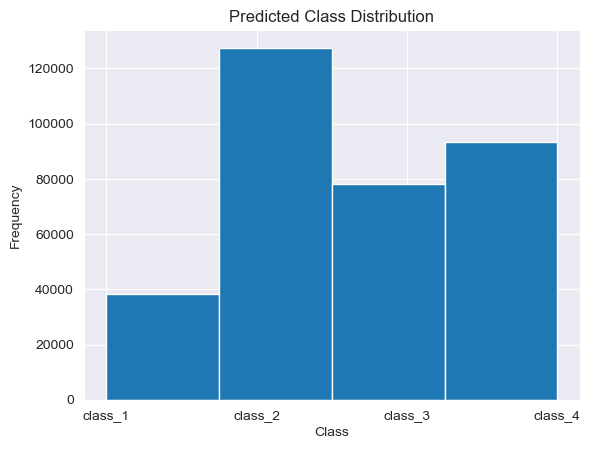

In [731]:
import matplotlib.pyplot as plt


# Определение классов
classes = ['class_1', 'class_2', 'class_3', 'class_4']

# Преобразование предсказаний в одномерный массив
predictions_classes = np.argmax(predict1, axis=1)

# Создание гистограммы
plt.hist(predictions_classes, bins=len(classes))
plt.xticks(range(len(classes)), classes)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Predicted Class Distribution')

# Отображение гистограммы
plt.show()

10548/10548 [==============================] - 14s 1ms/step
[[78745  4400    26     0]
 [39960 47561  1329     1]
 [10869  8209 41821 23080]
 [    0     1  4907 76622]]


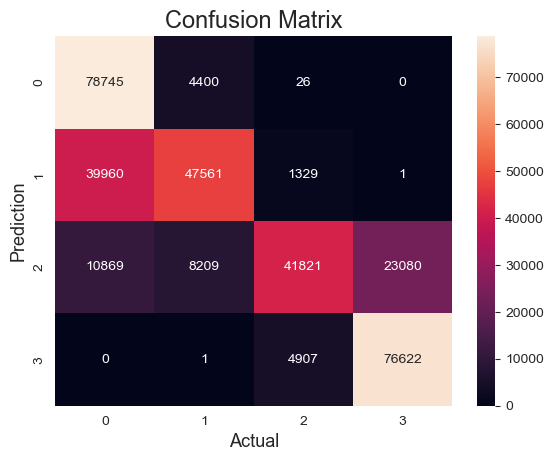

Accuracy   : 0.7251156190098095


In [732]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# compute the confusion matrix
y_pred=model2.predict(x_test)
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)

Точность модели увеличилась 0.44%. Это пока самый лучший результат

In [733]:
# Сохранение модели
model2.save('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/4 класса/model2_2.keras')

In [ ]:
# Загрузка модели
from tensorflow.keras.models import load_model

model2 = load_model('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/4 класса/model2_2.keras')

### Подача модели 2 на дообучение. LR=0.005

In [712]:
# Компиляция модели
optimizer=SGD(learning_rate=0.005)
model2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Обучение модели
history = model2.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=50, batch_size=256)


Epoch 1/50
4325/4325 [==============================] - 26s 6ms/step - loss: 0.4909 - accuracy: 0.7904 - val_loss: 0.6127 - val_accuracy: 0.7412
Epoch 2/50
4325/4325 [==============================] - 30s 7ms/step - loss: 0.4939 - accuracy: 0.7886 - val_loss: 0.6140 - val_accuracy: 0.7446
Epoch 3/50
4325/4325 [==============================] - 30s 7ms/step - loss: 0.4941 - accuracy: 0.7884 - val_loss: 0.9663 - val_accuracy: 0.6258
Epoch 4/50
4325/4325 [==============================] - 29s 7ms/step - loss: 0.4923 - accuracy: 0.7890 - val_loss: 0.6431 - val_accuracy: 0.7442
Epoch 5/50
4325/4325 [==============================] - 29s 7ms/step - loss: 0.4911 - accuracy: 0.7891 - val_loss: 0.6435 - val_accuracy: 0.7320
Epoch 6/50
4325/4325 [==============================] - 28s 7ms/step - loss: 0.4896 - accuracy: 0.7903 - val_loss: 0.5451 - val_accuracy: 0.7627
Epoch 7/50
4325/4325 [==============================] - 28s 6ms/step - loss: 0.4882 - accuracy: 0.7910 - val_loss: 0.7214 - val_ac

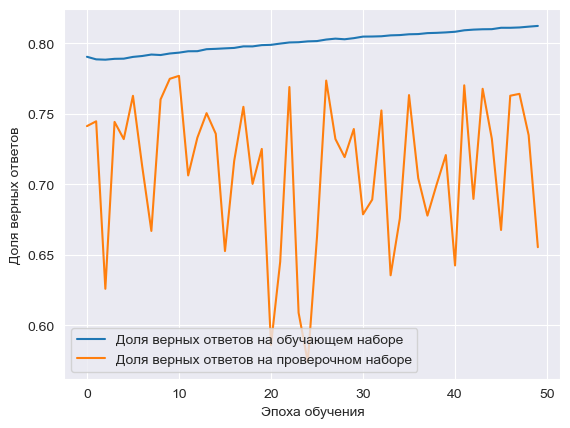

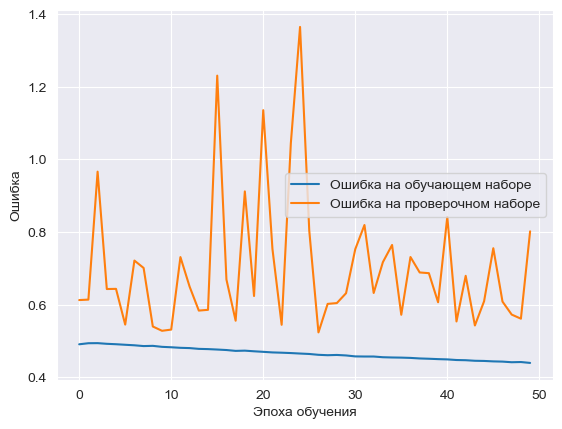

In [713]:
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [715]:
# Запустить, если размерность y_test 0)
#y_test = to_categorical(y_test, num_classes=4)
y_test.shape

(337531, 4)

In [716]:
loss, accuracy = model2.evaluate(x_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

10548/10548 [==============================] - 17s 2ms/step - loss: 0.7450 - accuracy: 0.6674
Loss: 0.7450128197669983
Accuracy: 0.6673935055732727


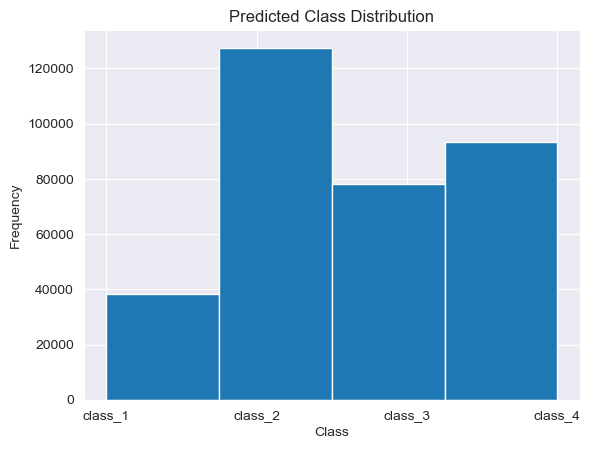

In [717]:
import matplotlib.pyplot as plt


# Определение классов
classes = ['class_1', 'class_2', 'class_3', 'class_4']

# Преобразование предсказаний в одномерный массив
predictions_flat = np.argmax(predict1, axis=1)

# Создание гистограммы
plt.hist(predictions_flat, bins=len(classes))
plt.xticks(range(len(classes)), classes)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Predicted Class Distribution')

# Отображение гистограммы
plt.show()

10548/10548 [==============================] - 15s 1ms/step
[[61355 17798  4018     0]
 [31109 39921 17821     0]
 [ 6744  5289 49237 22709]
 [    1     2  6774 74753]]


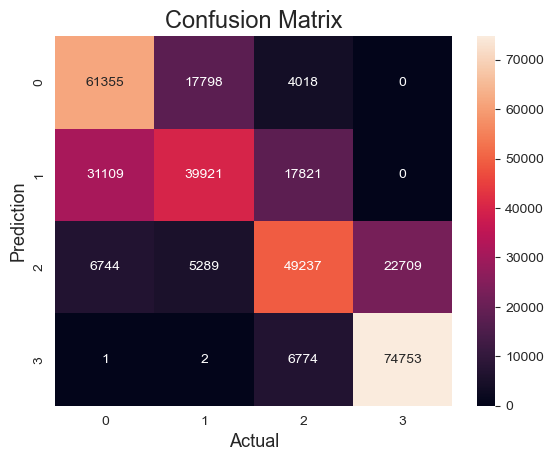

Accuracy   : 0.6673935134846873


In [718]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# compute the confusion matrix
y_pred=model2.predict(x_test)
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)

Точность упала на 5% - с 72% на 67%

In [719]:
# Сохранение модели
model2.save('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/4 класса/model2_1.keras')

In [ ]:
# Загрузка модели
from tensorflow.keras.models import load_model

model2 = load_model('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/4 класса/model2_1.keras')

### Эксперимент 7. Параметры: BN, 896, 352, 96, Elu, SGD, 256

In [12]:
from keras.models import Sequential
from keras.layers import Dense


# Создание модели нейронной сети
model7 = Sequential()
model7.add(BatchNormalization(input_dim=x_train.shape[1]))
model7.add(Dense(896, activation='elu'))
model7.add(Dense(352, activation='elu'))
model7.add(Dense(96, activation='elu'))
model7.add(Dense(4, activation='softmax'))

# Компиляция модели
model7.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Обучение модели
history = model7.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=30, batch_size=256)


Epoch 1/30
4325/4325 [==============================] - 35s 8ms/step - loss: 0.4409 - accuracy: 0.8174 - val_loss: 0.4788 - val_accuracy: 0.8005
Epoch 2/30
4325/4325 [==============================] - 37s 9ms/step - loss: 0.2650 - accuracy: 0.8844 - val_loss: 0.5365 - val_accuracy: 0.8050
Epoch 3/30
4325/4325 [==============================] - 36s 8ms/step - loss: 0.2382 - accuracy: 0.8946 - val_loss: 0.6041 - val_accuracy: 0.7979
Epoch 4/30
4325/4325 [==============================] - 36s 8ms/step - loss: 0.2264 - accuracy: 0.8993 - val_loss: 0.5318 - val_accuracy: 0.8162
Epoch 5/30
4325/4325 [==============================] - 38s 9ms/step - loss: 0.2191 - accuracy: 0.9017 - val_loss: 1.0877 - val_accuracy: 0.7750
Epoch 6/30
4325/4325 [==============================] - 37s 9ms/step - loss: 0.2134 - accuracy: 0.9039 - val_loss: 0.5639 - val_accuracy: 0.8107
Epoch 7/30
4325/4325 [==============================] - 37s 8ms/step - loss: 0.2081 - accuracy: 0.9061 - val_loss: 0.6058 - val_ac

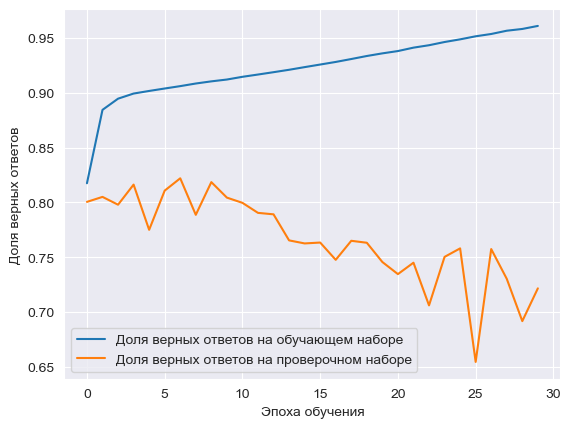

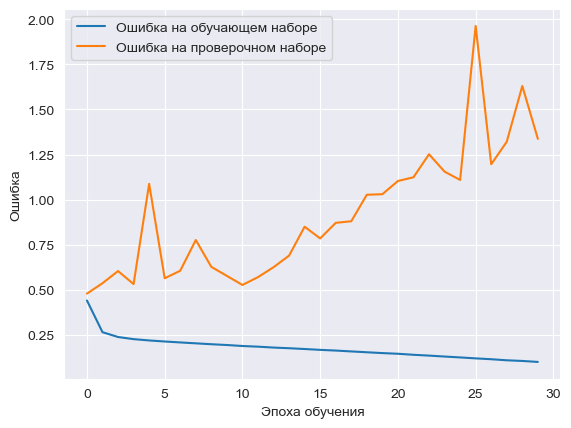

In [13]:
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [14]:
# Запустить, если размерность y_test 0)
#y_test = to_categorical(y_test, num_classes=4)
y_test.shape

(337531, 4)

In [15]:
loss, accuracy = model7.evaluate(x_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

10548/10548 [==============================] - 17s 2ms/step - loss: 1.7748 - accuracy: 0.7248
Loss: 1.7748366594314575
Accuracy: 0.7247926592826843


10548/10548 [==============================] - 15s 1ms/step
[[30816 49428  2927     0]
 [ 1514 80920  6417     0]
 [   10  2055 66088 15826]
 [   42     0 14672 66816]]


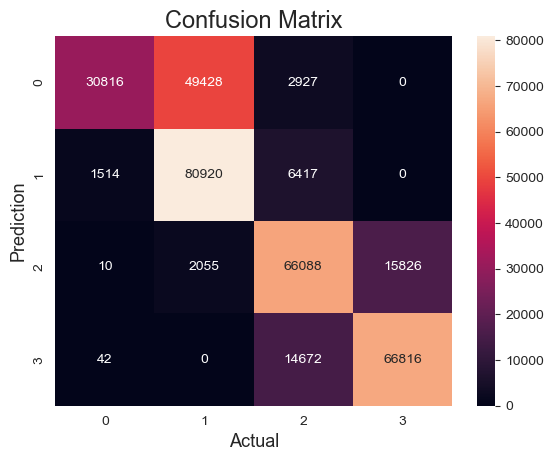

Accuracy   : 0.7247926857088682


In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# compute the confusion matrix
y_pred=model7.predict(x_test)
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)

In [17]:
# Сохранение модели
model7.save('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/4 класса/model7.keras')

In [36]:
# Загрузка модели
from tensorflow.keras.models import load_model

model7 = load_model('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/4 класса/model7.keras')

In [37]:
# Загрузка весов из файла checkpoint
model7.load_weights('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/4 класса/CheckPoints/Trial03/checkpoint')

In [38]:
# Проверяем, были ли веса успешно загружены
weights_loaded = model7.weights != []

if weights_loaded:
    print("Загрузка весов произведена успешно.")
else:
    print("Ошибка при загрузке весов.")

Загрузка весов произведена успешно.


In [30]:
pip install --upgrade keras

Note: you may need to restart the kernel to use updated packages.


In [39]:
from tensorflow.keras.callbacks import Callback
from keras.callbacks import EarlyStopping

# Callback для ранней остановки модели


class StopTrainingCallback(Callback):
    def __init__(self):
        super(StopTrainingCallback, self).__init__()

    def on_epoch_end(self, epoch, logs=None):
        current_metric = logs.get('val_accuracy')
        if current_metric > getattr(self, 'best_metric', 0):
            self.best_metric = current_metric
        else:
            self.model.stop_training = True



In [40]:
# Компиляция модели
model7.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Определение callback EarlyStopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

# Обучение модели
history = model7.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=30, callbacks=[early_stopping_callback], batch_size=256)


Epoch 1/30
4325/4325 [==============================] - 33s 7ms/step - loss: 0.1987 - accuracy: 0.9101 - val_loss: 0.5477 - val_accuracy: 0.8086
Epoch 2/30
4325/4325 [==============================] - 36s 8ms/step - loss: 0.1936 - accuracy: 0.9125 - val_loss: 0.5189 - val_accuracy: 0.7942
Epoch 3/30
4325/4325 [==============================] - 34s 8ms/step - loss: 0.1889 - accuracy: 0.9148 - val_loss: 0.6820 - val_accuracy: 0.7594
Epoch 4/30
4325/4325 [==============================] - 34s 8ms/step - loss: 0.1849 - accuracy: 0.9165 - val_loss: 0.7009 - val_accuracy: 0.7827
Epoch 5/30
4325/4325 [==============================] - 35s 8ms/step - loss: 0.1814 - accuracy: 0.9185 - val_loss: 0.7346 - val_accuracy: 0.7612


In [42]:
# Сохраняем веса модели в файл
model7.save_weights(filepath='/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/4 класса/CheckPoints/Trial03/weights7.h5')


In [43]:
# Компиляция модели
model7.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Определение callback EarlyStopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

# Обучение модели
history = model7.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=30, callbacks=[early_stopping_callback], batch_size=256)


Epoch 1/30
4325/4325 [==============================] - 33s 8ms/step - loss: 0.1767 - accuracy: 0.9208 - val_loss: 0.8672 - val_accuracy: 0.7526
Epoch 2/30
4325/4325 [==============================] - 36s 8ms/step - loss: 0.1721 - accuracy: 0.9236 - val_loss: 0.9862 - val_accuracy: 0.7116
Epoch 3/30
4325/4325 [==============================] - 35s 8ms/step - loss: 0.1684 - accuracy: 0.9255 - val_loss: 1.0425 - val_accuracy: 0.7441
Epoch 4/30
4325/4325 [==============================] - 35s 8ms/step - loss: 0.1638 - accuracy: 0.9284 - val_loss: 1.0545 - val_accuracy: 0.7339


# Составная модель

In [813]:
# Подключение библиотек
from keras.layers import Dropout, Dense, BatchNormalization, concatenate, Input
from keras.models import Model

### Определение столбцов для x_train

In [742]:
df_train.head(3)

,owner_id,contract_id,issue_dt,close_dt,region_name,city_name,population,date_of_birth,gender,education,position,dt_nbki,id_nbki,issued,amount,type_credit,status_credit,period,psk,balance,current_indebtedness,expired,last_payment,updated,term_indebtedness_body_loan,term_indebtedness_interest,term_indebtedness_other,overdue_indebtedness_body_loan,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_Months,amount_surety,source_information,maximum_amount_overdue_indebtedness,date_credit_state,amount_principal_debt_repaid,availability_support,Client_class
0,104,23492,1665964800,1668816000,3,468,182291,373161600,0,1,20,1665964800,3330,1148688000,0.00,12,2,2197584000,0.000,141531.65,0.0,0.0,1421280000,1660608000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,1421280000,140070.97,0,0
1,104,23492,1665964800,1668816000,3,468,182291,373161600,0,1,20,1665964800,3330,1370476800,168000.00,11,2,1529280000,0.000,268860.28,0.0,0.0,1529280000,1529452800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3240.15,1529280000,168000.00,0,0
2,104,23492,1665964800,1668816000,3,468,182291,373161600,0,1,20,1665964800,3330,1418860800,29356.04,21,2,1450310400,40.998,39779.33,0.0,0.0,1450310400,1451433600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,1450310400,29356.04,0,0


In [743]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1106976 entries, 0 to 1708072
Data columns (total 38 columns):
 #   Column                               Non-Null Count    Dtype   
---  ------                               --------------    -----   
 0   owner_id                             1106976 non-null  category
 1   contract_id                          1106976 non-null  category
 2   issue_dt                             1106976 non-null  category
 3   close_dt                             1106976 non-null  category
 4   region_name                          1106976 non-null  category
 5   city_name                            1106976 non-null  category
 6   population                           1106976 non-null  category
 7   date_of_birth                        1106976 non-null  category
 8   gender                               1106976 non-null  category
 9   education                            1106976 non-null  category
 10  position                             1106976 non-null 

In [42]:
# Размер обучающей выборки общей
print(x_train.shape) 
print(y_train.shape)
# Пример обработанных данных по индексу 0
n = 0 
print(x_train[n])
print(y_train[n])

(1106976, 37)
(1106976, 4)
[1.24410549e-02 2.65091432e+00 7.24583178e+01 2.08355371e+00
 1.41443008e-01 2.48128704e+00 5.59996394e-01 1.26740858e+00
 0.00000000e+00 4.19873213e-01 3.47956998e+00 7.85739879e+01
 3.96485657e-01 1.28123514e+01 0.00000000e+00 4.44852183e+00
 4.76448506e+00 6.95103123e+00 0.00000000e+00 9.54748566e-01
 0.00000000e+00 0.00000000e+00 2.83538820e+00 2.62591476e+01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.69114082e+01 1.53757325e+00
 0.00000000e+00]
[1. 0. 0. 0.]


In [47]:
# Указанные столбцы для x1 и x2
columns_x1 = [i for i in range(17)] + [23, 32, 34, 36]
columns_x2 = [i for i in range(17, 23)] + [i for i in range(24, 32)] + [33, 35]

# Создание массива x1
xTrain01 = x_train[:, columns_x1]

# Создание массива x2
xTrain02 = x_train[:, columns_x2]

In [48]:
# Размер обучающей выборки, разделенной по столбцам
print(xTrain01.shape) 
print(xTrain02.shape)
# Пример обработанных данных по индексу 0
n = 0 
print(xTrain01[n])
print()
print(xTrain02[n])

(1106976, 21)
(1106976, 16)
[0.10740576 0.77432642 0.76276276 0.80980981 0.0970971  0.5955956
 0.75875876 0.60533195 0.         0.1951952  0.91691692 0.76676677
 0.11398814 0.00227591 0.         0.03603604 1.         0.8038038
 0.         0.02997289 0.        ]

[0.98866943 0.         0.97779982 0.         0.         0.1437787
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.99077872]


In [63]:
y_train.shape

(1106976, 4)

### Определение столбцов для x_val

In [45]:
# Размер валидационной выборки общей
print(x_val.shape) 
print(y_val.shape)
# Пример обработанных данных по индексу 0
n = 0 
print(x_val[n])
print(y_val[n])

(263566, 37)
(263566, 4)
[0.12012489 0.78706059 0.6016016  0.63963964 0.26526527 0.45595596
 0.66716717 0.7724162  0.         0.27627628 0.79379379 0.50700701
 0.39543347 0.03234438 0.91240977 1.         0.11711712 0.05678318
 0.         0.         0.         0.         0.22556471 0.03955871
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.07862083 0.
 0.        ]
[1. 0. 0. 0.]


In [50]:
# Указанные столбцы для xVal01 и xVal02
columns_x1 = [i for i in range(17)] + [23, 32, 34, 36]
columns_x2 = [i for i in range(17, 23)] + [i for i in range(24, 32)] + [33, 35]

# Создание массива xVal01
xVal01 = x_val[:, columns_x1]

# Создание массива xVal02
xVal02 = x_val[:, columns_x2]

In [51]:
# Вывод значений 
print(xVal01.shape) 
print(xVal02.shape)
# Пример обработанных данных
n = 0 
print(xVal01[n])
print()
print(xVal02[n])

(263566, 21)
(263566, 16)
[0.12012489 0.78706059 0.6016016  0.63963964 0.26526527 0.45595596
 0.66716717 0.7724162  0.         0.27627628 0.79379379 0.50700701
 0.39543347 0.03234438 0.91240977 1.         0.11711712 0.03955871
 0.         0.07862083 0.        ]

[0.05678318 0.         0.         0.         0.         0.22556471
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


In [52]:
y_val.shape

(263566, 4)

In [53]:
y_test.shape


(337531,)

### Определение столбцов для x_test

In [55]:
# Указанные столбцы для xTest01 и xTest02
columns_x1 = [i for i in range(17)] + [23, 32, 34, 36]
columns_x2 = [i for i in range(17, 23)] + [i for i in range(24, 32)] + [33, 35]

# Создание массива xVal01
xTest01 = x_test[:, columns_x1]

# Создание массива xVal02
xTest02 = x_test[:, columns_x2]

In [56]:
# Вывод значений 
print(xTest01.shape) 
print(xTest02.shape)
# Пример обработанных данных
n = 0 
print(xTest01[n])
print()
print(xTest02[n])

(337531, 21)
(337531, 16)
[0.10747229 0.00443109 0.89139139 0.87838996 0.21621622 0.4994995
 0.85435435 0.59332468 0.         0.31331331 0.77377377 0.93993994
 0.72939584 0.029005   0.93095558 0.86636637 0.28478478 0.98048048
 0.         0.33906703 0.        ]

[0.20263714 0.         0.95897468 0.         0.         0.15940643
 0.         0.         0.         0.         0.         0.
 0.         0.         0.98249576 0.96169705]


In [768]:
# Можно не запускать
# Перевод всех значений в numpy массив

xTrain01 = np.array(xTrain01)
xTrain02 = np.array(xTrain02)
xVal01 = np.array(xVal01)
xVal02 = np.array(xVal02)
y_train = np.array(y_train)
y_val = np.array(y_val)

In [57]:
xTrain01

array([[0.10740576, 0.77432642, 0.76276276, ..., 0.        , 0.02997289,
        0.        ],
       [0.10740576, 0.77432642, 0.76276276, ..., 0.        , 0.18468468,
        0.        ],
       [0.10740576, 0.77432642, 0.76276276, ..., 0.        , 0.0433433 ,
        0.        ],
       ...,
       [0.83640999, 0.94836049, 0.95795796, ..., 0.55705706, 0.80680681,
        0.        ],
       [0.83640999, 0.94836049, 0.95795796, ..., 0.55705706, 0.82282282,
        0.        ],
       [0.83640999, 0.94836049, 0.95795796, ..., 0.55705706, 0.82482482,
        0.        ]])

In [58]:
# Вывод значений 
print(xVal01.shape) 
print(xVal02.shape)

# Пример обработанных данных индекса 0
n = 0 
print(xVal01[n])
print()
print(xVal02[n])




(263566, 21)
(263566, 16)
[0.12012489 0.78706059 0.6016016  0.63963964 0.26526527 0.45595596
 0.66716717 0.7724162  0.         0.27627628 0.79379379 0.50700701
 0.39543347 0.03234438 0.91240977 1.         0.11711712 0.03955871
 0.         0.07862083 0.        ]

[0.05678318 0.         0.         0.         0.         0.22556471
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


In [59]:

print('Размер Train', y_train.shape)
print ('Размер x1, x2', xTrain01.shape, xTrain02.shape)
print()
print('Размер Val', y_val.shape)
print ('Размер xVal01, xVal02', xVal01.shape, xVal02.shape)
print()
print('Размер Test', y_test.shape)
print ('Размер xTest01, xTest02', xTest01.shape, xTest02.shape)


Размер Train (1106976, 4)
Размер x1, x2 (1106976, 21) (1106976, 16)

Размер Val (263566, 4)
Размер xVal01, xVal02 (263566, 21) (263566, 16)

Размер Test (337531,)
Размер xTest01, xTest02 (337531, 21) (337531, 16)


In [74]:
input1 = Input(shape=(xTrain01.shape[1],))
input2 = Input(shape=(xTrain02.shape[1],))

x1 = BatchNormalization()(input1) # Создаем ветку х1
x1 = Dense(864, activation="selu")(x1)
x1 = Dense(416, activation="selu")(x1)
x1 = Dense(64, activation = "selu")(x1)

x2 = BatchNormalization()(input2) # Создаем ветку х2
x2 = Dense(896, activation="relu")(x2)
x2 = Dense(160, activation="relu")(x2)
x2 = Dense(64, activation = "elu")(x2)


x = concatenate([x1, x2]) # Объединяем все две ветки

x = Dense(32, activation='selu')(x)
#x = Dropout(0.5)(x)
x = Dense(4, activation='softmax')(x) # Финальный нейрон, делает классификацию

model5 = Model((input1, input2), x) # В Model загружаем стартовые и последнюю точки 



In [75]:
model5.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 21)]                 0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 16)]                 0         []                            
                                                                                                  
 batch_normalization (Batch  (None, 21)                   84        ['input_1[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_1 (Bat  (None, 16)                   64        ['input_2[0][0]']         

In [76]:
# Компиляция модели
optimizer=SGD(learning_rate=0.0001)
model5.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Обучение модели

history = model5.fit([xTrain01, xTrain02], y_train, 
                     validation_data=([xVal01, xVal02], [y_val]), 
                     epochs=10)



Epoch 1/10
34593/34593 [==============================] - 164s 5ms/step - loss: 0.6857 - accuracy: 0.7101 - val_loss: 0.7166 - val_accuracy: 0.6590
Epoch 2/10
34593/34593 [==============================] - 159s 5ms/step - loss: 0.5278 - accuracy: 0.7871 - val_loss: 0.6123 - val_accuracy: 0.7334
Epoch 3/10
34593/34593 [==============================] - 155s 4ms/step - loss: 0.4214 - accuracy: 0.8266 - val_loss: 0.5305 - val_accuracy: 0.7667
Epoch 4/10
34593/34593 [==============================] - 157s 5ms/step - loss: 0.3724 - accuracy: 0.8439 - val_loss: 0.5018 - val_accuracy: 0.7825
Epoch 5/10
34593/34593 [==============================] - 155s 4ms/step - loss: 0.3486 - accuracy: 0.8531 - val_loss: 0.4919 - val_accuracy: 0.7877
Epoch 6/10
34593/34593 [==============================] - 154s 4ms/step - loss: 0.3338 - accuracy: 0.8589 - val_loss: 0.4848 - val_accuracy: 0.7907
Epoch 7/10
34593/34593 [==============================] - 158s 5ms/step - loss: 0.3245 - accuracy: 0.8624 - val_

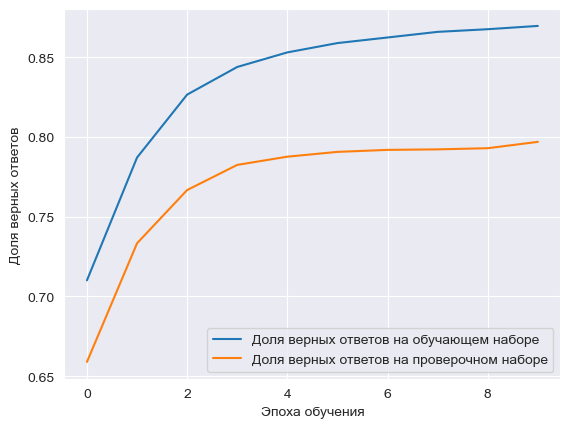

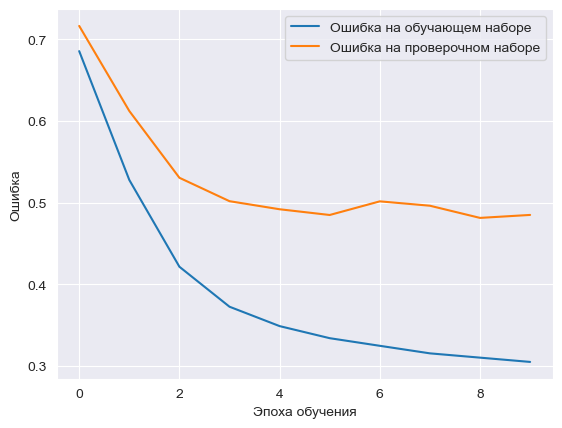

In [77]:
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [79]:
# Запустить, если размерность y_test 0)
#y_test = to_categorical(y_test, num_classes=4)
y_test.shape


(337531, 4)

In [80]:
loss, accuracy = model5.evaluate([xTest01, xTest02], y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

10548/10548 [==============================] - 20s 2ms/step - loss: 0.5476 - accuracy: 0.7394
Loss: 0.5476034283638
Accuracy: 0.7393631935119629


10548/10548 [==============================] - 17s 2ms/step
[[29263 53905     3     0]
 [ 1736 86815   300     0]
 [   34  5033 60672 18240]
 [    0     0  8722 72808]]


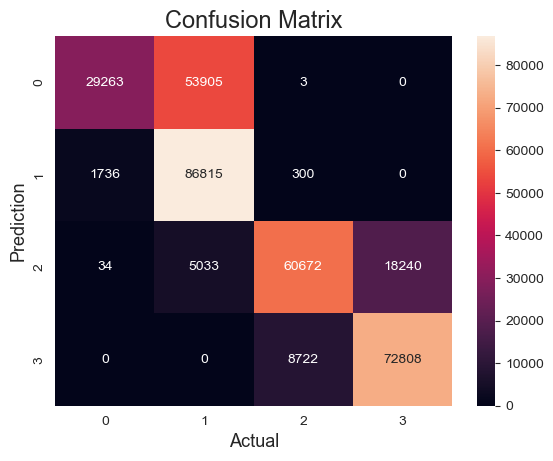

Accuracy   : 0.7393631992320705


In [81]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# compute the confusion matrix
y_pred=model5.predict([xTest01, xTest02])
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)

Точность увеличилась на 1.5%. Теперь это самый точный результат


In [873]:
# Сохранение модели 4
model4.save('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/4 класса/model4.keras')

In [6]:
# Загрузка модели
from tensorflow.keras.models import load_model

model4 = load_model('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/4 класса/model4.keras')

In [82]:
# Сохранение модели 5
model5.save('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/4 класса/model5.keras')

In [101]:
# Загрузка модели
from tensorflow.keras.models import load_model

model5 = load_model('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/4 класса/model5.keras')

### Добучение лучшей модели 5 с Callback

In [134]:
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint

class StopTrainingCallback(Callback):
    def __init__(self, monitor_metric='val_loss', patience=3):
        super(StopTrainingCallback, self).__init__()
        self.monitor_metric = monitor_metric
        self.patience = patience
        self.num_epochs_without_improvement = 0
        self.best_metric = float('inf')                                # Инициализировать лучшую метрику
    
    def on_epoch_end(self, epoch, logs=None):
        if self.num_epochs_without_improvement >= self.patience:
            self.model.stop_training = True
        elif self.monitor_metric in logs:
            if logs[self.monitor_metric] < self.best_metric:
                self.num_epochs_without_improvement += 1
            else:
                self.best_metric = logs[self.monitor_metric]
                self.num_epochs_without_improvement = 0
        else:
            raise ValueError('Metric {} is not in logs'.format(self.monitor_metric))

callbacks = [EarlyStopping(patience=3),
             ModelCheckpoint(filepath='/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/4 класса/model5.hdf5', save_best_only=True),
             StopTrainingCallback(patience=3)]


In [110]:
# Компиляция модели
optimizer=SGD(learning_rate=0.0001)
model5.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Обучение модели

history = model5.fit([xTrain01, xTrain02], y_train, 
                     validation_data=([xVal01, xVal02], [y_val]), 
                     epochs=10, callbacks=callbacks)


Epoch 1/10
34593/34593 [==============================] - 158s 5ms/step - loss: 0.2891 - accuracy: 0.8757 - val_loss: 0.4679 - val_accuracy: 0.7952
Epoch 2/10
34593/34593 [==============================] - 155s 4ms/step - loss: 0.2856 - accuracy: 0.8769 - val_loss: 0.4778 - val_accuracy: 0.7952
Epoch 3/10
34593/34593 [==============================] - 151s 4ms/step - loss: 0.2830 - accuracy: 0.8779 - val_loss: 0.4854 - val_accuracy: 0.7843
Epoch 4/10
34593/34593 [==============================] - 156s 5ms/step - loss: 0.2804 - accuracy: 0.8791 - val_loss: 0.4879 - val_accuracy: 0.7767


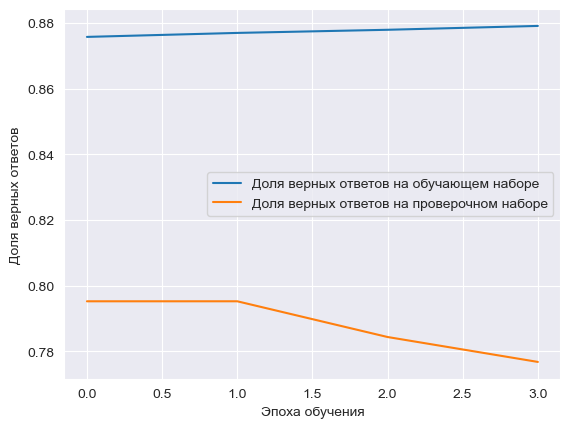

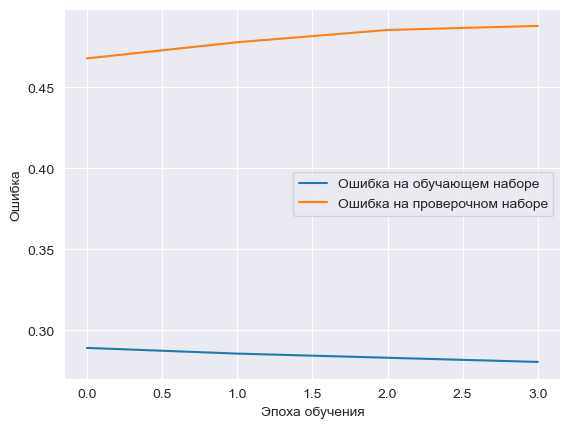

In [111]:
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [112]:
# Сохранение модели промежуточной модели 5_1
model5.save('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/4 класса/model5_1.keras')

### Подача на дообучение


In [113]:
# Загрузка весов из файла checkpoint
model5.load_weights(filepath='/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/4 класса/weights5.hdf5')
   

In [117]:
# Компиляция модели

optimizer=SGD(learning_rate=0.001)
model5.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Обучение модели

history = model5.fit([xTrain01, xTrain02], y_train, 
                     validation_data=([xVal01, xVal02], [y_val]), 
                     epochs=10, callbacks=callbacks)


Epoch 1/10
34593/34593 [==============================] - 150s 4ms/step - loss: 0.2307 - accuracy: 0.9007 - val_loss: 0.4700 - val_accuracy: 0.7943
Epoch 2/10
34593/34593 [==============================] - 150s 4ms/step - loss: 0.2233 - accuracy: 0.9037 - val_loss: 0.4765 - val_accuracy: 0.7896
Epoch 3/10
34593/34593 [==============================] - 152s 4ms/step - loss: 0.2173 - accuracy: 0.9067 - val_loss: 0.4878 - val_accuracy: 0.7900
Epoch 4/10
34593/34593 [==============================] - 153s 4ms/step - loss: 0.2122 - accuracy: 0.9095 - val_loss: 0.4940 - val_accuracy: 0.7919


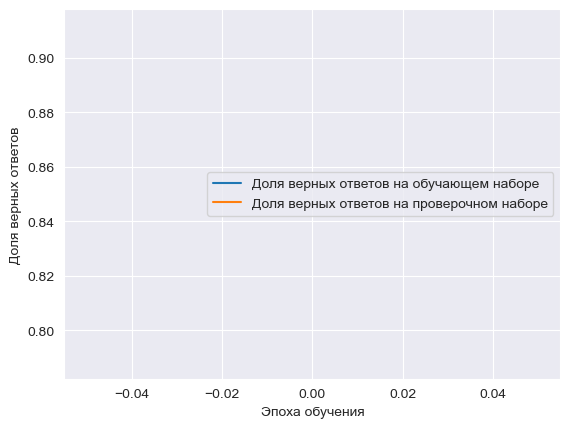

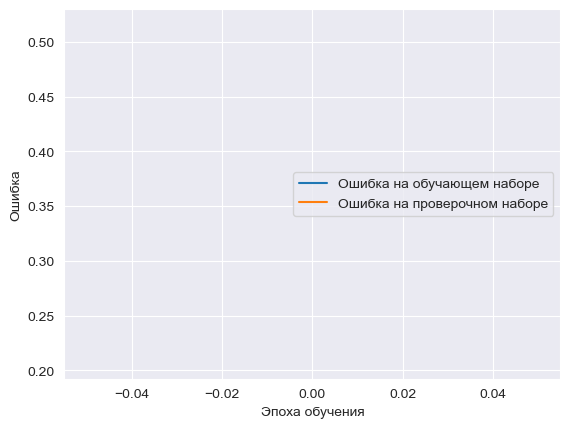

In [120]:
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [121]:
# Сохранение модели промежуточной модели 5_1
model5.save('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/4 класса/model5_1.keras')

In [119]:
# Компиляция модели

optimizer=SGD(learning_rate=0.001)
model5.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Обучение модели

history = model5.fit([xTrain01, xTrain02], y_train, 
                     validation_data=([xVal01, xVal02], [y_val]), 
                     epochs=10, callbacks=callbacks)


Epoch 1/10
34593/34593 [==============================] - 157s 4ms/step - loss: 0.2077 - accuracy: 0.9117 - val_loss: 0.5145 - val_accuracy: 0.7884


### Промежуточная проверка качества

In [123]:
# Запустить, если размерность y_test 0)
#y_test = to_categorical(y_test, num_classes=4)
y_test.shape

(337531, 4)

In [124]:
loss, accuracy = model5.evaluate([xTest01, xTest02], y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

10548/10548 [==============================] - 19s 2ms/step - loss: 0.8165 - accuracy: 0.7462
Loss: 0.8165028691291809
Accuracy: 0.7461507320404053


10548/10548 [==============================] - 17s 2ms/step
[[31647 46405  5119     0]
 [  795 85598  2458     0]
 [   89  3000 63554 17336]
 [    0     0 10480 71050]]


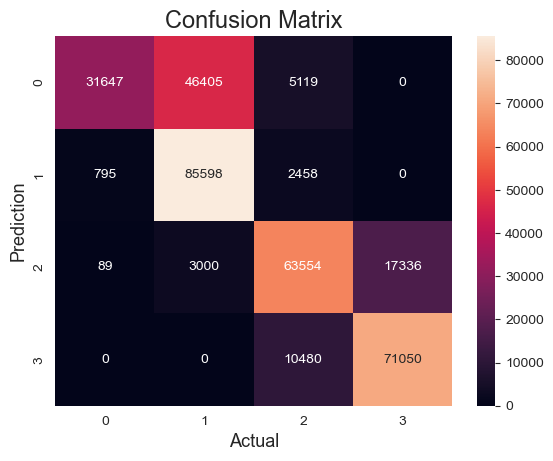

Accuracy   : 0.7461507239335053


In [125]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# compute the confusion matrix
y_pred=model5.predict([xTest01, xTest02])
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)

In [131]:
# Сохранение модели 5 
model5.save('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/4 класса/model5.keras')

### Снова дообучение

In [135]:
# Компиляция модели

optimizer=SGD(learning_rate=0.001)
model5.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Обучение модели

history = model5.fit([xTrain01, xTrain02], y_train, 
                     validation_data=([xVal01, xVal02], [y_val]), 
                     epochs=10, callbacks=callbacks)


Epoch 1/10
34593/34593 [==============================] - 155s 4ms/step - loss: 0.1881 - accuracy: 0.9217 - val_loss: 0.5409 - val_accuracy: 0.7828
Epoch 2/10
34593/34593 [==============================] - 153s 4ms/step - loss: 0.1843 - accuracy: 0.9236 - val_loss: 0.5388 - val_accuracy: 0.7933
Epoch 3/10
34593/34593 [==============================] - 156s 5ms/step - loss: 0.1794 - accuracy: 0.9260 - val_loss: 0.5711 - val_accuracy: 0.7793
Epoch 4/10
34593/34593 [==============================] - 157s 5ms/step - loss: 0.1752 - accuracy: 0.9282 - val_loss: 0.5962 - val_accuracy: 0.7730


### Финальная оценка качества модели 5

In [137]:
# Запустить, если размерность y_test 0)
#y_test = to_categorical(y_test, num_classes=4)
y_test.shape

(337531, 4)

In [138]:
loss, accuracy = model5.evaluate([xTest01, xTest02], y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

10548/10548 [==============================] - 19s 2ms/step - loss: 0.8569 - accuracy: 0.7389
Loss: 0.8569087982177734
Accuracy: 0.7389128804206848


10548/10548 [==============================] - 17s 2ms/step
[[32537 43876  6758     0]
 [ 1330 84759  2762     0]
 [   94  3430 62995 17460]
 [    0     0 12415 69115]]


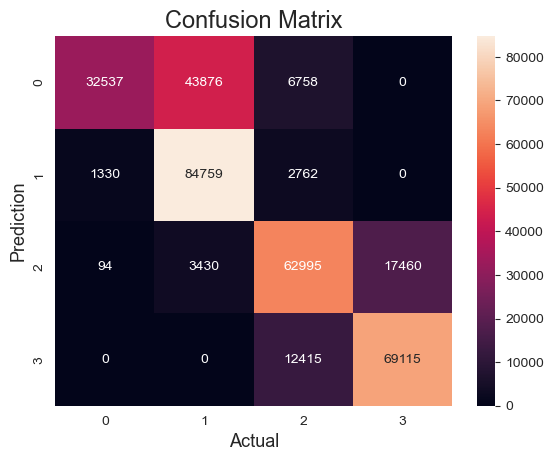

Accuracy   : 0.7389128702252534


In [139]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# compute the confusion matrix
y_pred=model5.predict([xTest01, xTest02])
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)

После многочисленных запусков дообучения модели, результат ухудшился на 0.8%

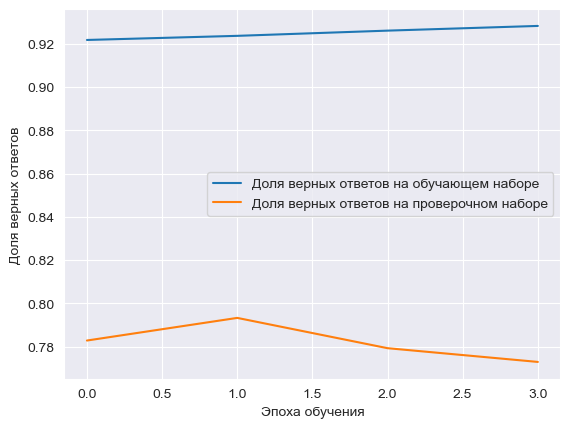

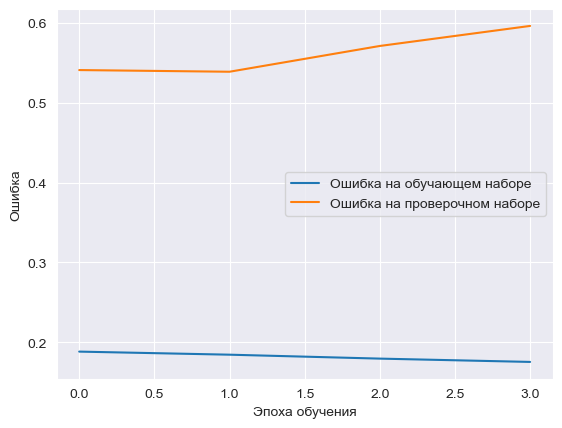

In [141]:
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

### Возведение в квадраты выборок и прогон по лучшей архитектуре

In [83]:
x_train_Sq = np.hstack((x_train, x_train ** 2))
x_val_Sq = np.hstack((x_val, x_val ** 2))
x_test_Sq = np.hstack((x_test, x_test ** 2))



In [84]:
from keras.models import Sequential
from keras.layers import Dense


# Создание модели нейронной сети
model6 = Sequential()
model6.add(Dense(864, input_dim=x_train_Sq.shape[1], activation='selu'))
#model2.add(BatchNormalization())
model6.add(Dense(416, activation='selu'))
model6.add(Dense(4, activation='softmax'))

# Компиляция модели
model6.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Обучение модели
history = model6.fit(x_train_Sq, y_train, validation_data=(x_val_Sq, y_val), epochs=30, batch_size=256)


Epoch 1/30
4325/4325 [==============================] - 27s 6ms/step - loss: 0.5279 - accuracy: 0.7934 - val_loss: 0.6357 - val_accuracy: 0.7473
Epoch 2/30
4325/4325 [==============================] - 29s 7ms/step - loss: 0.3496 - accuracy: 0.8532 - val_loss: 0.4973 - val_accuracy: 0.7936
Epoch 3/30
4325/4325 [==============================] - 30s 7ms/step - loss: 0.3046 - accuracy: 0.8694 - val_loss: 0.6484 - val_accuracy: 0.7709
Epoch 4/30
4325/4325 [==============================] - 29s 7ms/step - loss: 0.2797 - accuracy: 0.8803 - val_loss: 0.6078 - val_accuracy: 0.7888
Epoch 5/30
4325/4325 [==============================] - 29s 7ms/step - loss: 0.2619 - accuracy: 0.8877 - val_loss: 0.5801 - val_accuracy: 0.7880
Epoch 6/30
4325/4325 [==============================] - 28s 6ms/step - loss: 0.2450 - accuracy: 0.8938 - val_loss: 0.4693 - val_accuracy: 0.8239
Epoch 7/30
4325/4325 [==============================] - 27s 6ms/step - loss: 0.2375 - accuracy: 0.8975 - val_loss: 0.5893 - val_ac

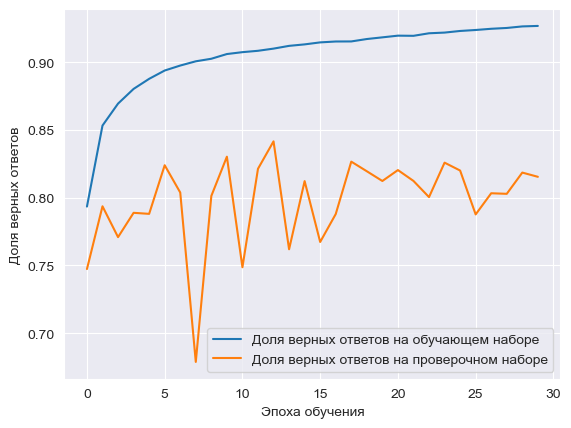

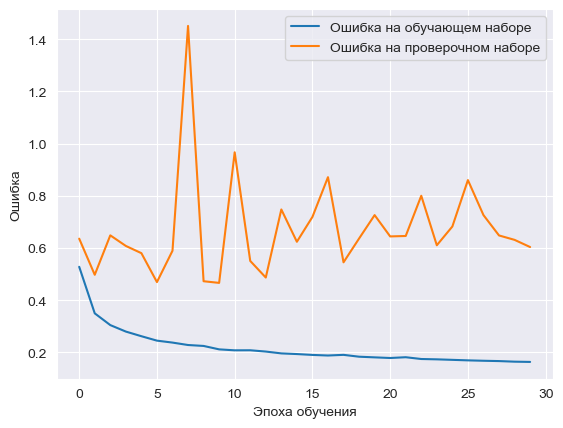

In [85]:
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [87]:
# Запустить, если размерность y_test 0)
#y_test = to_categorical(y_test, num_classes=4)
y_test.shape

(337531, 4)

In [88]:
loss, accuracy = model6.evaluate(x_test_Sq, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

10548/10548 [==============================] - 17s 2ms/step - loss: 1.3275 - accuracy: 0.7243
Loss: 1.327519416809082
Accuracy: 0.7243423461914062


10548/10548 [==============================] - 16s 2ms/step
[[32270 49852  1049     0]
 [ 6102 76231  6518     0]
 [   36  1181 69156 13606]
 [    5     0 14694 66831]]


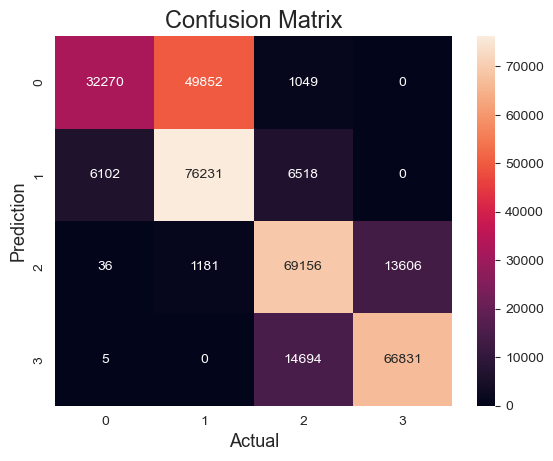

Accuracy   : 0.724342356702051


In [89]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# compute the confusion matrix
y_pred=model6.predict(x_test_Sq)
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)

Квадраты особо не улучшили показатели. Снова появилась пила. Продолжаем работу с донормированными значениями. 

In [90]:
# Сохранение модели 6
model6.save('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/4 класса/model6.keras')

In [ ]:
# Загрузка модели
#from tensorflow.keras.models import load_model

model6 = load_model('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/4 класса/model6.keras')

### Эксперимент составной модели Functional API со сверточным слоем Conv1D

In [60]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Concatenate, Reshape, Model, Input

In [157]:
input1 = Input(shape=(xTrain01.shape[1],))
input2 = Input(shape=(xTrain02.shape[1],))

# Преобразование формы входных тензоров в трехмерный
input1_1 = Reshape((xTrain01.shape[1], 1))(input1)
input2_2 = Reshape((xTrain02.shape[1], 1))(input2)


#x1 = BatchNormalization()(input1) # Создаем ветку х1

x1 = Conv1D(filters=32, kernel_size=3, activation='relu')(input1_1)
x1 = Flatten()(x1)
x1 = Dense(864, activation="elu")(x1)
x1 = Dropout(0.2)(x1)
x1 = Dense(416, activation="elu")(x1)
#x1 = Dropout(0.2)(x1)
x1 = Dense(64, activation = "elu")(x1)

#x2 = BatchNormalization()(input2) # Создаем ветку х2
x2 = Conv1D(filters=64, kernel_size=3, activation='relu')(input2_2)
x2 = Flatten()(x1)
x2 = Dense(896, activation="elu")(x2)
x2 = Dropout(0.2)(x2)
x2 = Dense(160, activation="elu")(x2)
#x2 = Dropout(0.2)(x2)
x2 = Dense(64, activation ="elu")(x2)


x = concatenate([x1, x2]) # Объединяем все две ветки

x = Dense(32, activation='elu')(x)
#x = Dropout(0.2)(x)
x = Dense(4, activation='softmax')(x) # Финальный нейрон, делает классификацию

model8 = Model((input1, input2), x) # В Model загружаем стартовые и последнюю точки 

# Проверка архитектуры модели
model8.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_29 (InputLayer)       [(None, 21)]                 0         []                            
                                                                                                  
 reshape_16 (Reshape)        (None, 21, 1)                0         ['input_29[0][0]']            
                                                                                                  
 conv1d_16 (Conv1D)          (None, 19, 32)               128       ['reshape_16[0][0]']          
                                                                                                  
 flatten_10 (Flatten)        (None, 608)                  0         ['conv1d_16[0][0]']           
                                                                                            

In [158]:
# Компиляция модели
optimizer=SGD(learning_rate=0.001)
model8.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Обучение модели

history = model8.fit([xTrain01, xTrain02], y_train, 
                     validation_data=([xVal01, xVal02], [y_val]), 
                     epochs=10)



Epoch 1/10
34593/34593 [==============================] - 292s 8ms/step - loss: 0.5272 - accuracy: 0.7683 - val_loss: 0.6252 - val_accuracy: 0.7502
Epoch 2/10
34593/34593 [==============================] - 285s 8ms/step - loss: 0.2737 - accuracy: 0.8769 - val_loss: 0.9664 - val_accuracy: 0.7200
Epoch 3/10
34593/34593 [==============================] - 293s 8ms/step - loss: 0.2317 - accuracy: 0.8945 - val_loss: 1.1981 - val_accuracy: 0.7135
Epoch 4/10
34593/34593 [==============================] - 289s 8ms/step - loss: 0.2122 - accuracy: 0.9025 - val_loss: 1.2904 - val_accuracy: 0.7209
Epoch 5/10
34593/34593 [==============================] - 309s 9ms/step - loss: 0.2019 - accuracy: 0.9066 - val_loss: 1.4041 - val_accuracy: 0.7163
Epoch 6/10
34593/34593 [==============================] - 353s 10ms/step - loss: 0.1943 - accuracy: 0.9096 - val_loss: 1.5508 - val_accuracy: 0.7142
Epoch 7/10
34593/34593 [==============================] - 334s 10ms/step - loss: 0.1883 - accuracy: 0.9120 - va

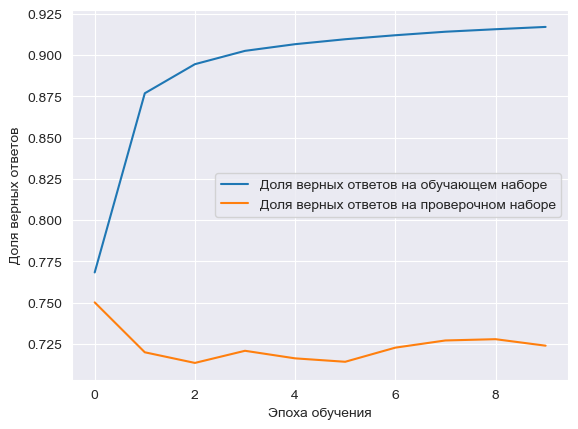

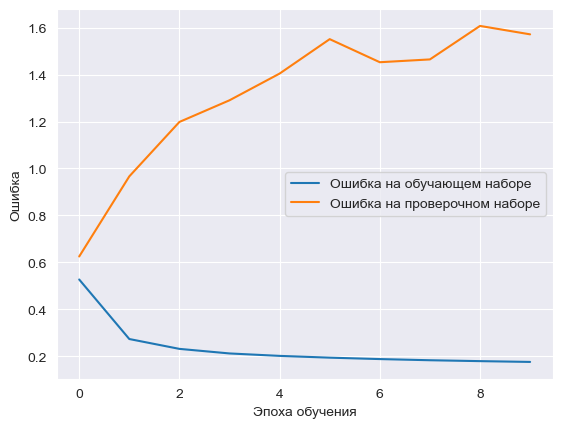

In [159]:
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [166]:
# Запустить, если размерность y_test 0)
#y_test = to_categorical(y_test, num_classes=4)
y_test.shape

(337531, 4)

In [162]:
loss, accuracy = model8.evaluate([xTest01, xTest02], y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

10548/10548 [==============================] - 35s 3ms/step - loss: 1.9456 - accuracy: 0.7209
Loss: 1.9456120729446411
Accuracy: 0.7209234237670898


10548/10548 [==============================] - 33s 3ms/step
[[22246 60686   239     0]
 [  401 84428  4022     0]
 [    0  1288 59801 22890]
 [    0     0  4671 76859]]


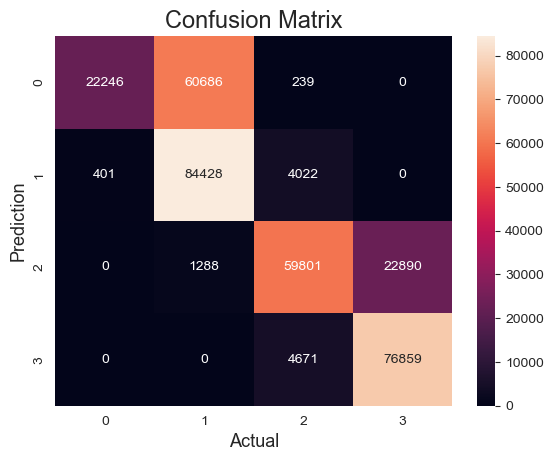

Accuracy   : 0.7209234114792419


In [163]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# compute the confusion matrix
y_pred=model8.predict([xTest01, xTest02])
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)

10548/10548 [==============================] - 35s 3ms/step
[[22246 60686   239     0]
 [  401 84428  4022     0]
 [    0  1288 59801 22890]
 [    0     0  4671 76859]]


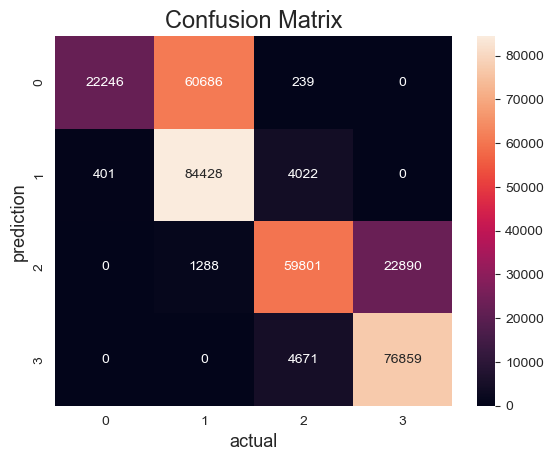

Accuracy   : 0.7209234114792419
Precision  : 0.7964425186862273
Recall     : 0.7209234114792419


In [167]:
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# compute the confusion matrix
y_pred = model8.predict([xTest01, xTest02])
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)

print(cm)

# plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='g')
plt.ylabel('prediction',fontsize=13)
plt.xlabel('actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

# calculate precision and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy   :", accuracy)
print("Precision  :", precision)
print("Recall     :", recall)

In [168]:
# Сохранение модели 8
#model8.save('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/4 класса/model8.keras')


In [144]:
# Загрузка модели
#from tensorflow.keras.models import load_model

model8 = load_model('/Users/Anna/Documents/Work Anna_new/1_УИИ/Стажировка_1/Рабочие базы/Новые базы/New_bases_2_3/4 класса/model8.keras')